In [2]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama as scnrma
import pandas as pd

sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=100)

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


# P17 gluta


In [12]:
P17_glut = adata_gluta[adata_gluta.obs.batch=='P17', :]
del P17_glut.obsp
del P17_glut.varm
del P17_glut.obsm
del P17_glut.uns
P17_glut.X = P17_glut.raw.X
sc.pp.highly_variable_genes(P17_glut, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs
sc.pp.scale(P17_glut, max_value=10) #scale
sc.tl.pca(P17_glut, svd_solver='arpack') #run PCA

P17_glut_CBs = list(P17_glut.obs.index)
P17_glut_batch = []
for i in range(len(P17_glut_CBs)):
    P17_glut_batch.append(P17_glut_CBs[i][19:25])
    
P17_glut.obs['sample'] = P17_glut.obs['batch']
P17_glut.obs['sample'] = P17_glut_batch

#sc.pp.neighbors(P17_glut, n_neighbors=25, n_pcs=40) #choose 25 standard for now
bbknn(P17_glut, batch_key='sample',neighbors_within_batch=6 ) #8*3~=25
sc.tl.leiden(P17_glut)
sc.tl.umap(P17_glut)

In [43]:
P17_glut = P17_glut[P17_glut.obs['leiden']!='15',:]
P17_glut = P17_glut[P17_glut.obs['leiden']!='17',:]

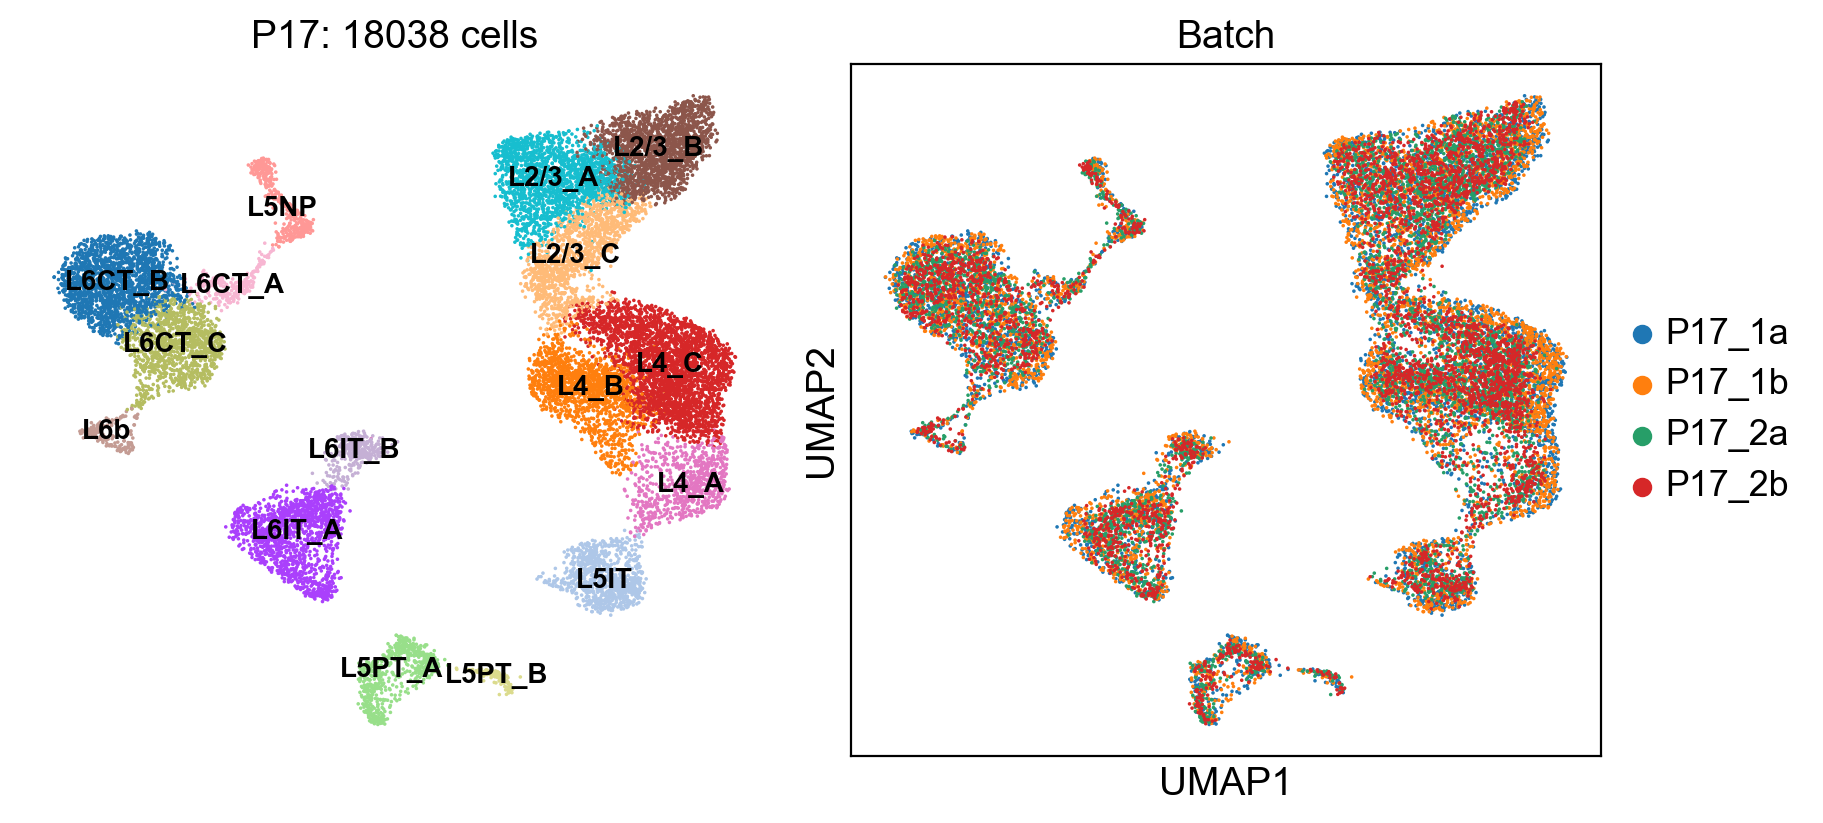

In [438]:
sc.tl.dendrogram(P17_glut, groupby='leiden')
fig, axs = plt.subplots(1, 2, figsize = (9,4), constrained_layout=True)
sc.pl.umap(P17_glut, color='cluster', ax=axs[0], legend_fontsize='10', 
           show=False, title='P17: ' + str(P17_glut.shape[0]) + ' cells', frameon=False, 
          palette=('#d62728', '#1f77b4', '#17becf', '#8c564b', '#ff7f0e', 
                  '#aa40fc', '#ffbb78', '#b5bd61', '#aec7e8', '#e377c2', 
                  '#98df8a', '#ff9896', '#c5b0d5', '#f7b6d2', '#c49c94', '#dbdb8d'), 
          legend_loc='on data')
sc.pl.umap(P17_glut, color='sample', ax=axs[1], show=False, title='Batch')

bias_markers = ['Snap25', 'Gad1', 'Gad2', 'Slc17a7', 'Inpp4b', 'Ctgf',
                'Foxp2', 'Cdh9', 'Bcl6', 'Slc17a8', 'Trhr', 'Rapgef3',
                'Cux2', 'Mdga1', 'Rorb',
                'Deptor', 'Rbp4', 'Batf3',
               'Osr1',  
                'Fam84b', 
                'Sla2',
                'Nxph4', 'Igsf9b']

#bias_pos = [(0,6), (7,15)]
#bias_labels = ['Neuronal', 'Non-Neuronal']
#sc.pl.dotplot(P17_glut, bias_markers, groupby='leiden', dendrogram=True)

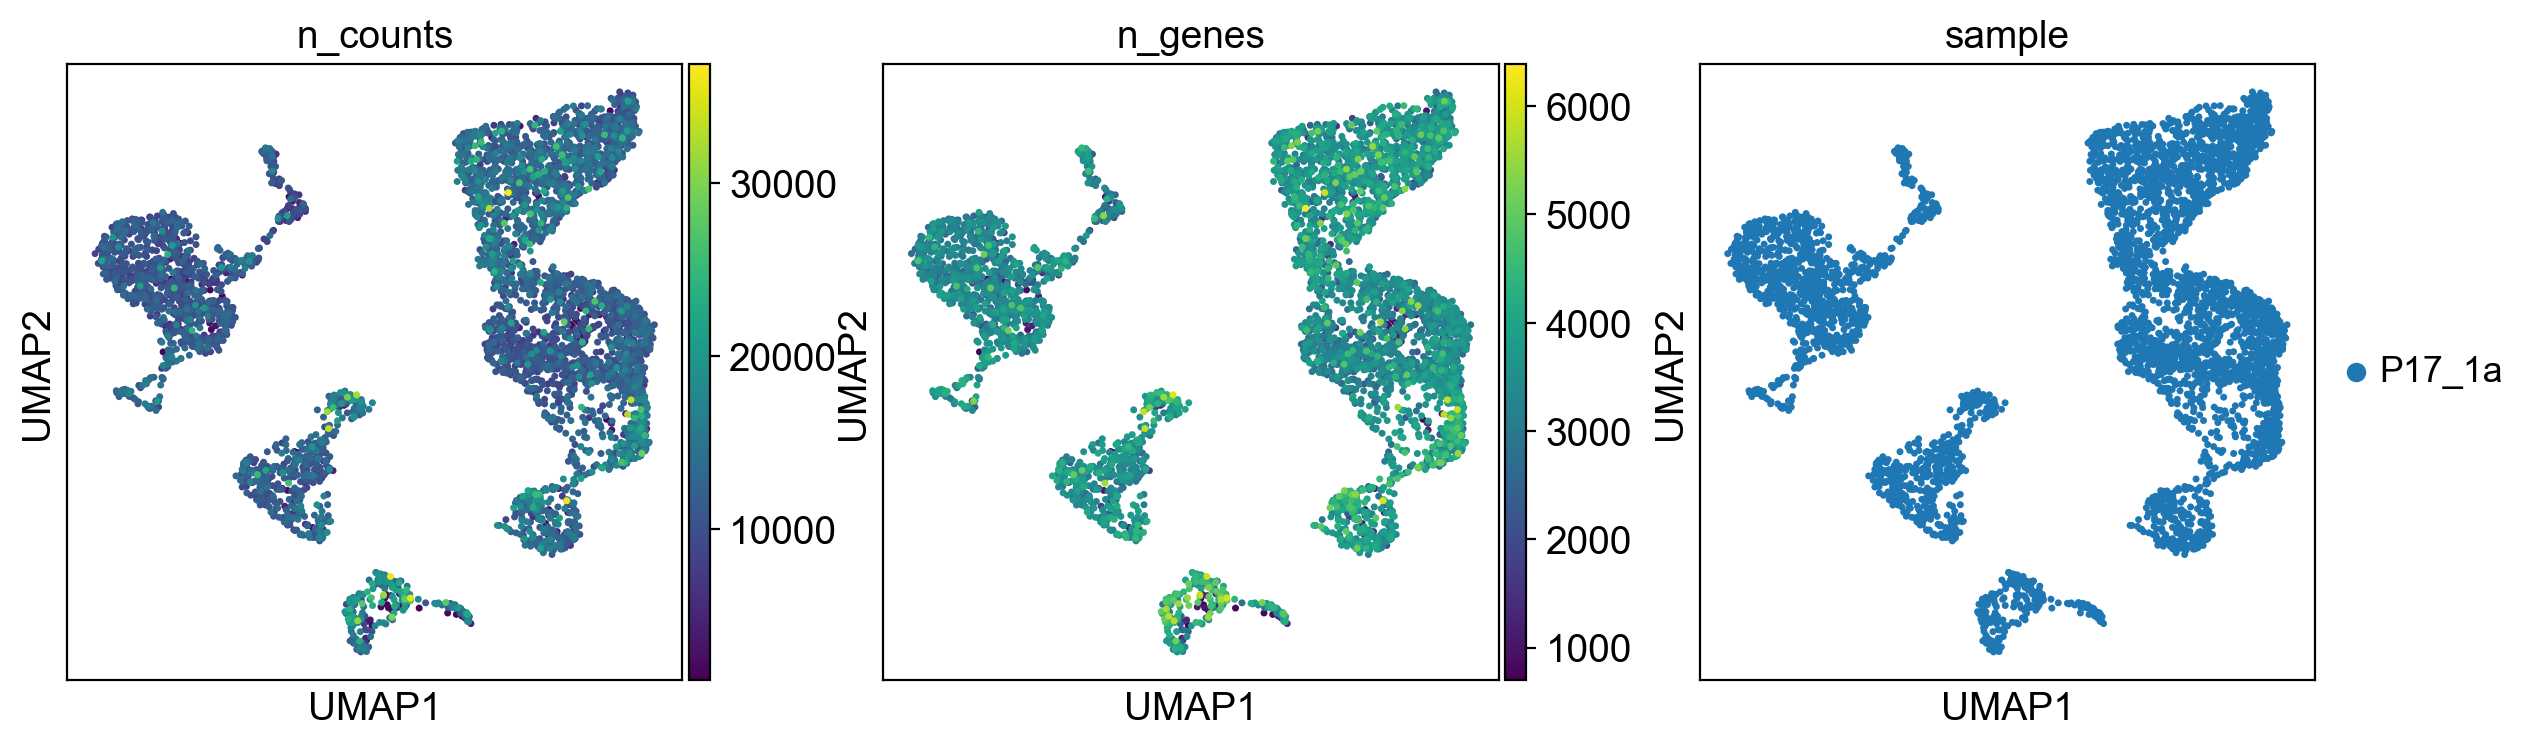

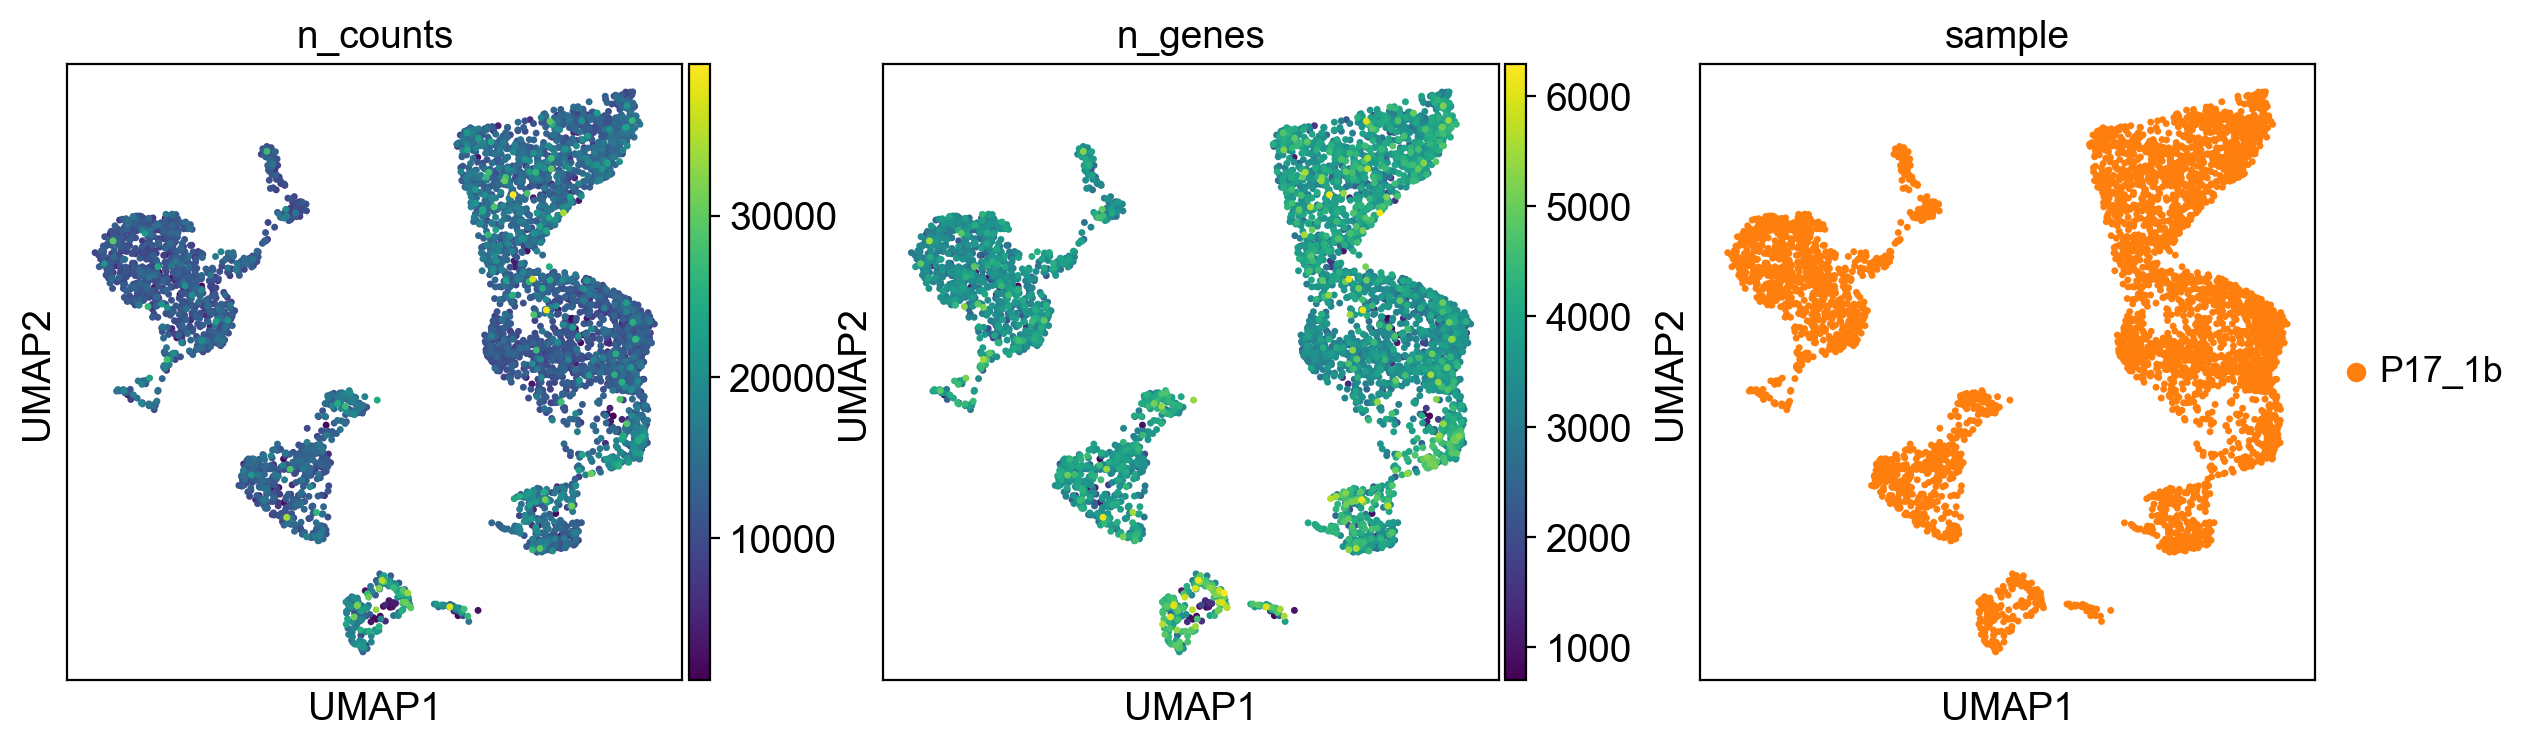

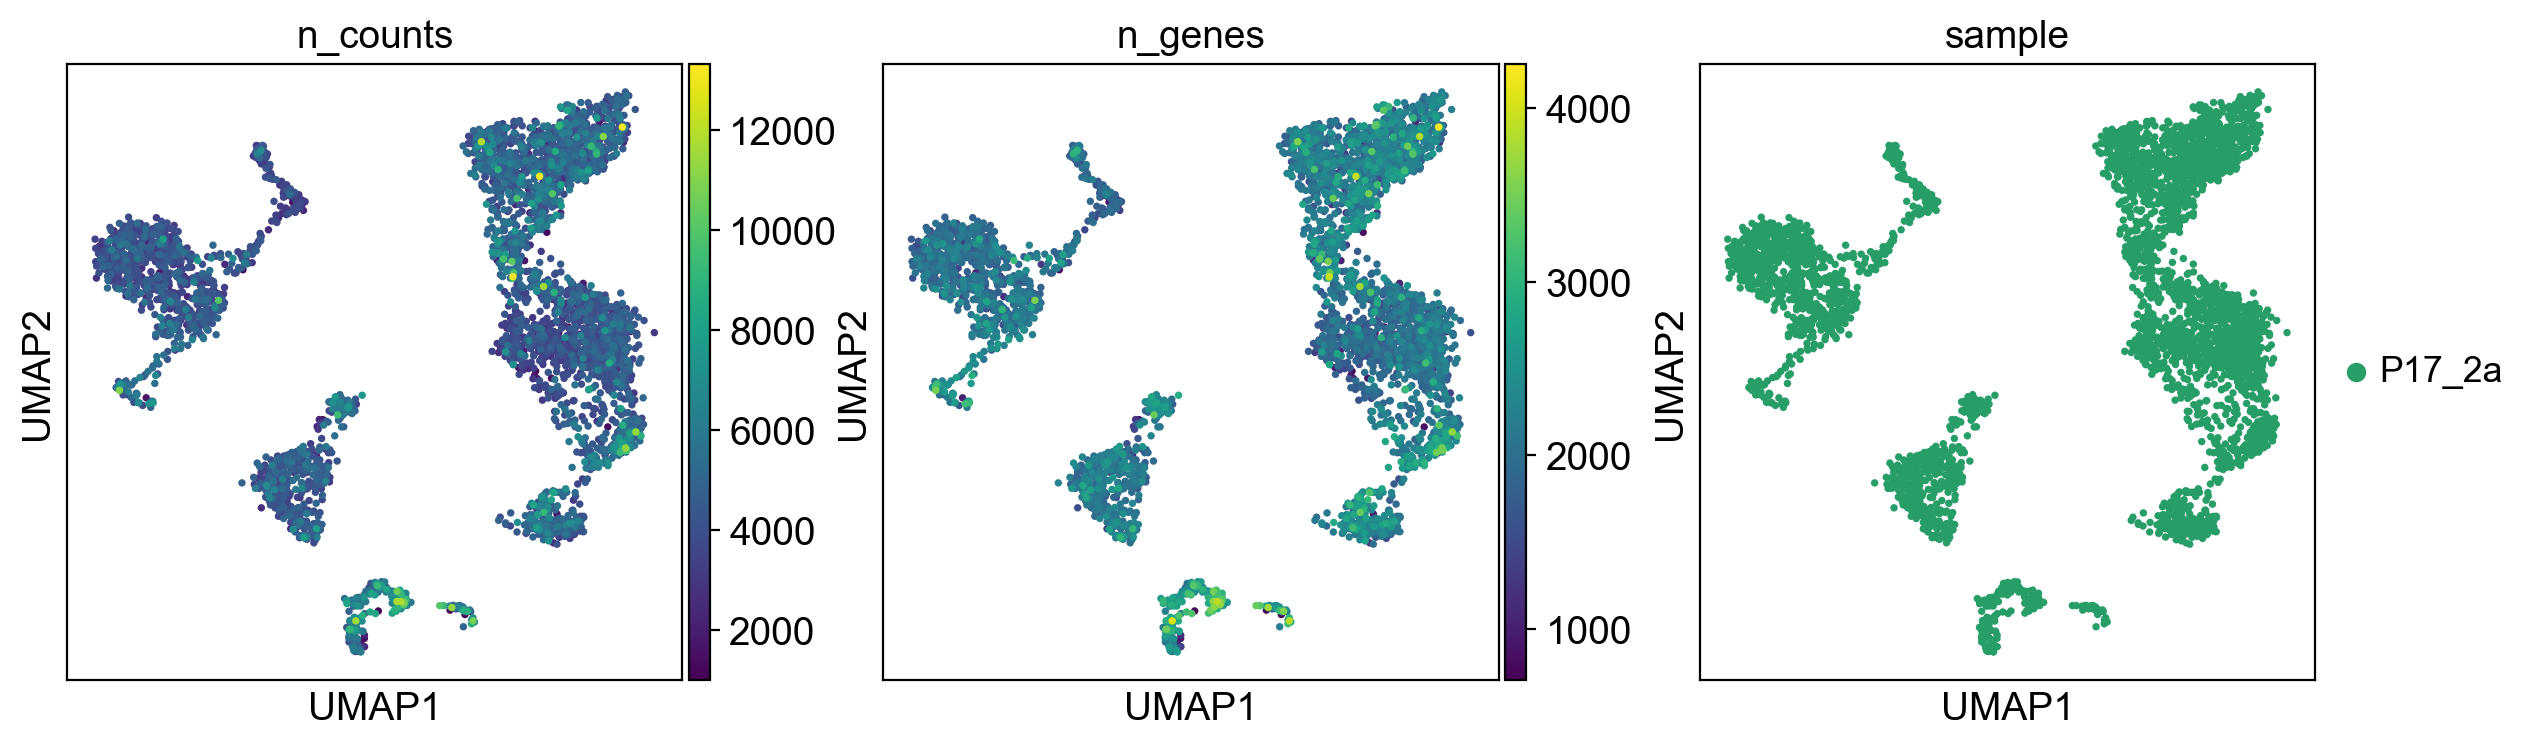

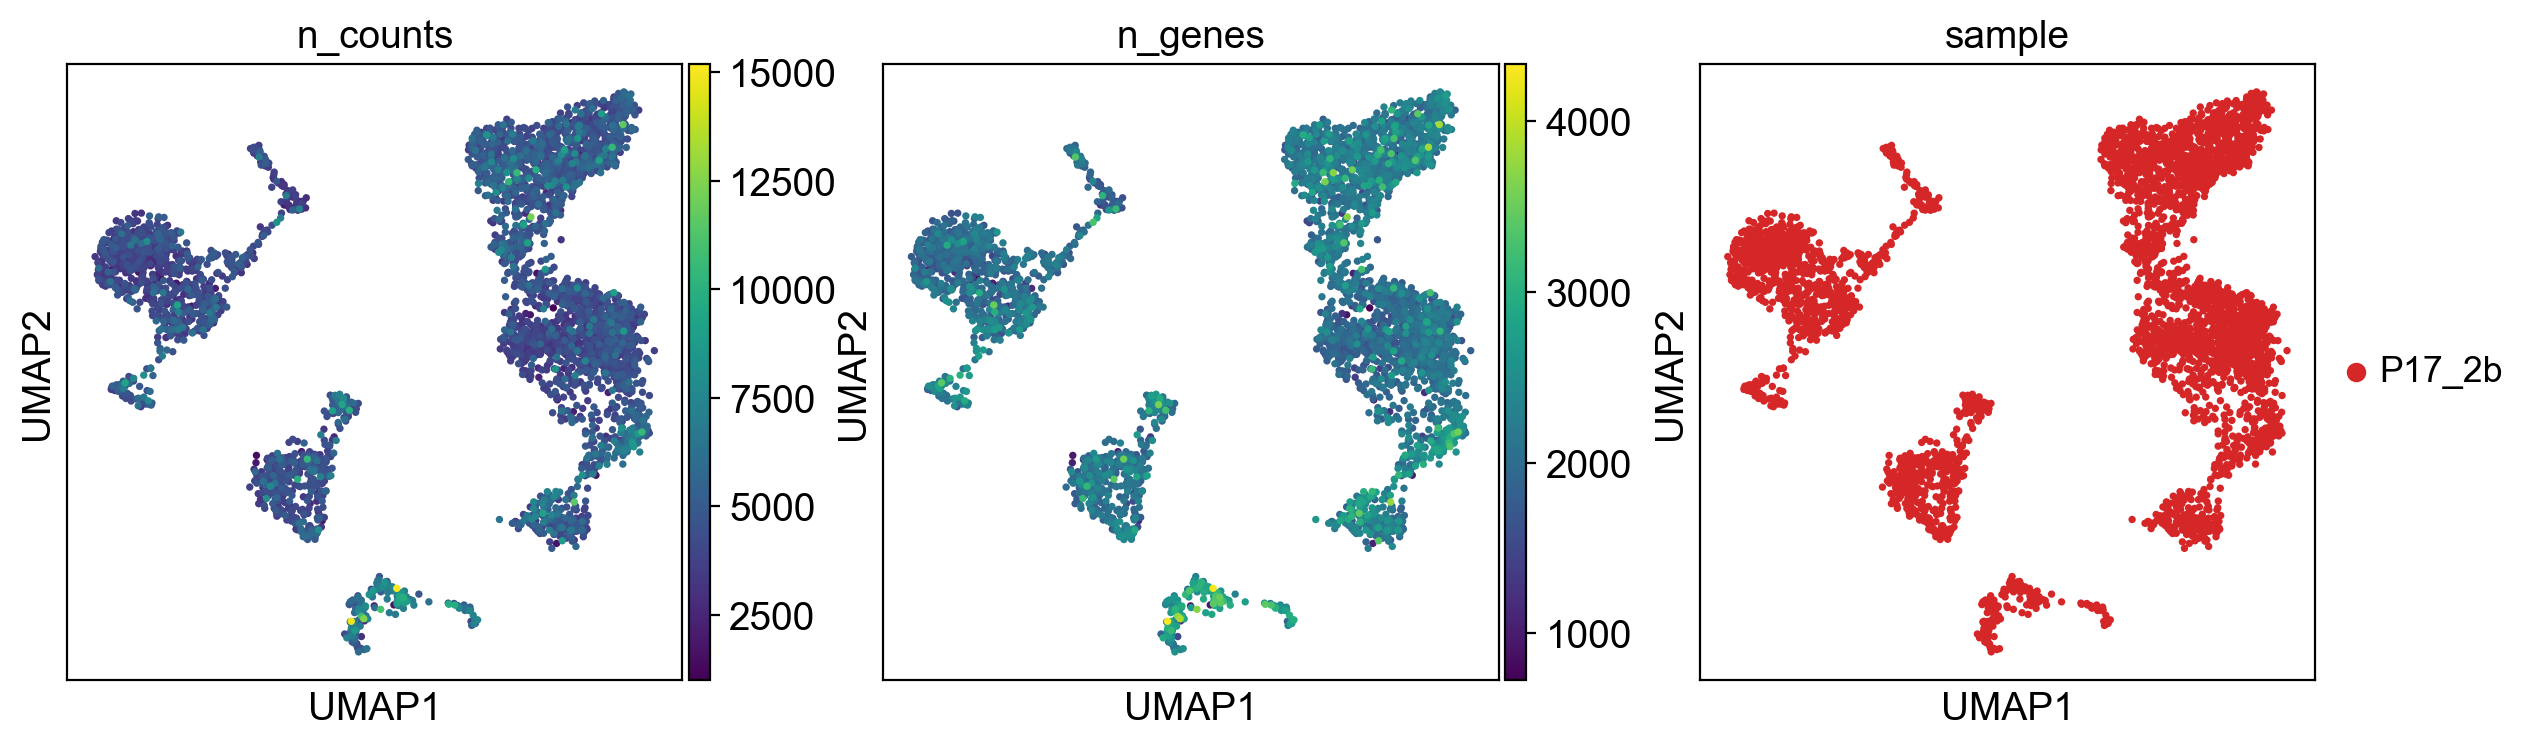

In [184]:
sc.pl.umap(P17_glut[P17_glut.obs['sample']=='P17_1a', :], 
           color=['n_counts', 'n_genes', 'sample'])
sc.pl.umap(P17_glut[P17_glut.obs['sample']=='P17_1b', :], 
           color=['n_counts', 'n_genes', 'sample'])
sc.pl.umap(P17_glut[P17_glut.obs['sample']=='P17_2a', :], 
           color=['n_counts', 'n_genes', 'sample'])
sc.pl.umap(P17_glut[P17_glut.obs['sample']=='P17_2b', :], 
           color=['n_counts', 'n_genes', 'sample'])

Bottom to top of dendrogram

* 4 to 9: L4 
* 6 to 3: L2/3
* 11: L5 NP
* 8: L5 IT
* 16, 10: L5 PT
* 12, 5: L6 IT
* 7 to 13: L6 CT
* 14: L6b

In [400]:
cluster_dict = {0:'L4_C', 1:'L6CT_B', 2:'L2/3_A', 3:'L2/3_B', 4:'L4_B', 5:'L6IT_A', 6:'L2/3_C', 
                7:'L6CT_C', 8:'L5IT', 9:'L4_A', 
                10:'L5PT_A', 11:'L5NP' ,12:'L6IT_B', 13:'L6CT_A', 14:'L6b', 16:'L5PT_B'}
cluster = []
for i in cluster_dict: cluster.append((cluster_dict[i]))

P17_glut.obs['cluster'] = P17_glut.obs['leiden']
P17_glut.rename_categories(key='cluster', categories=cluster)

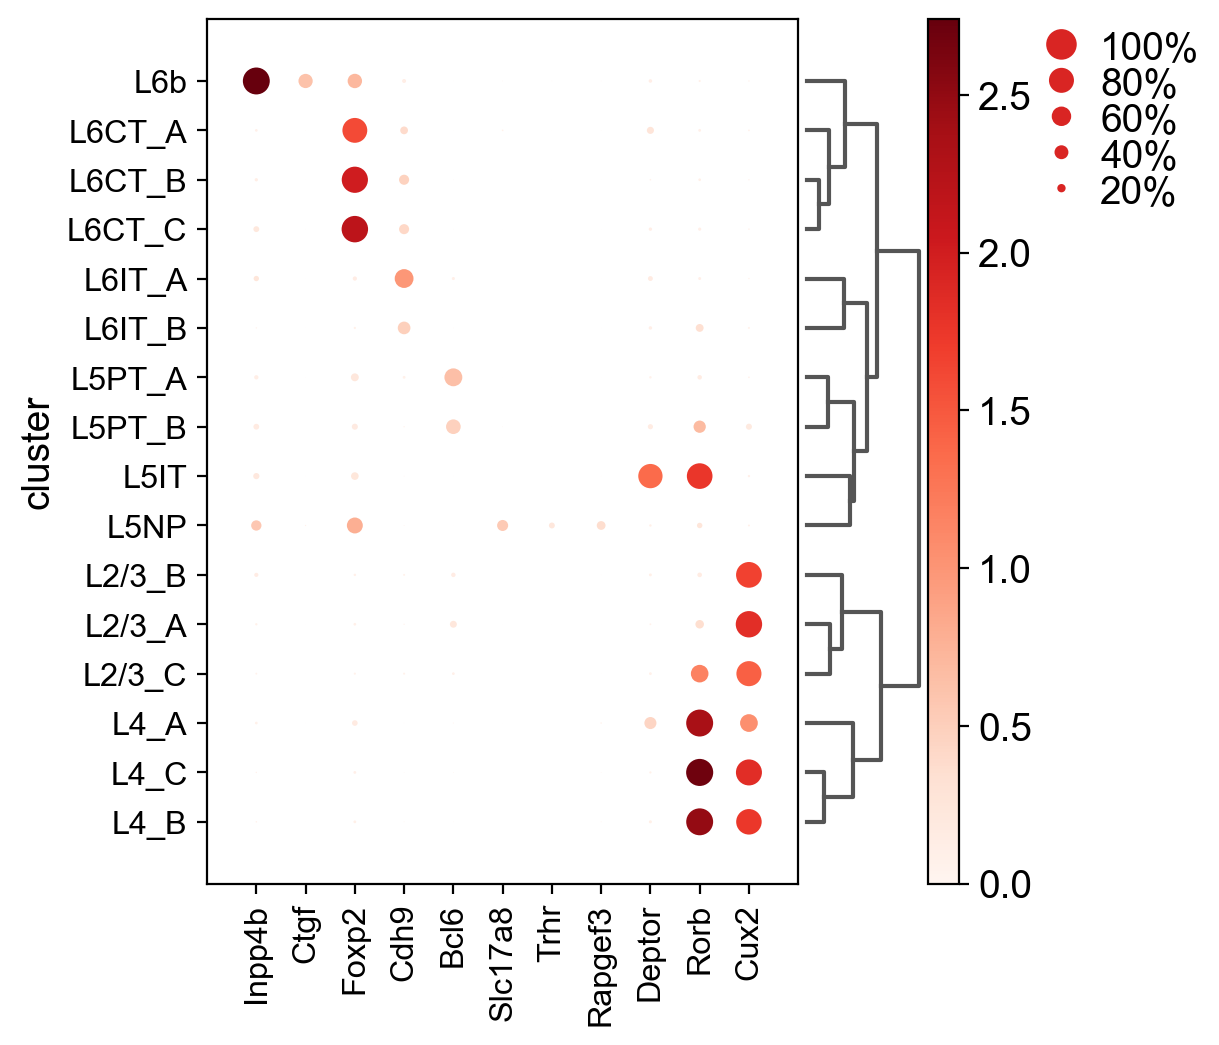

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[3.8499999999999996, 0.8, 0.2, 0.5, 0.25])

In [473]:
bias_markers = ['Inpp4b', 'Ctgf',
                'Foxp2', 'Cdh9', 'Bcl6', 'Slc17a8', 'Trhr', 'Rapgef3',
                 'Deptor', 'Rorb', 'Cux2']

#bias_pos = [(0,6), (7,15)]
#bias_labels = ['Neuronal', 'Non-Neuronal']
sc.pl.dotplot(P17_glut, bias_markers, groupby='cluster', dendrogram=True, dot_min=0, dot_max=1)

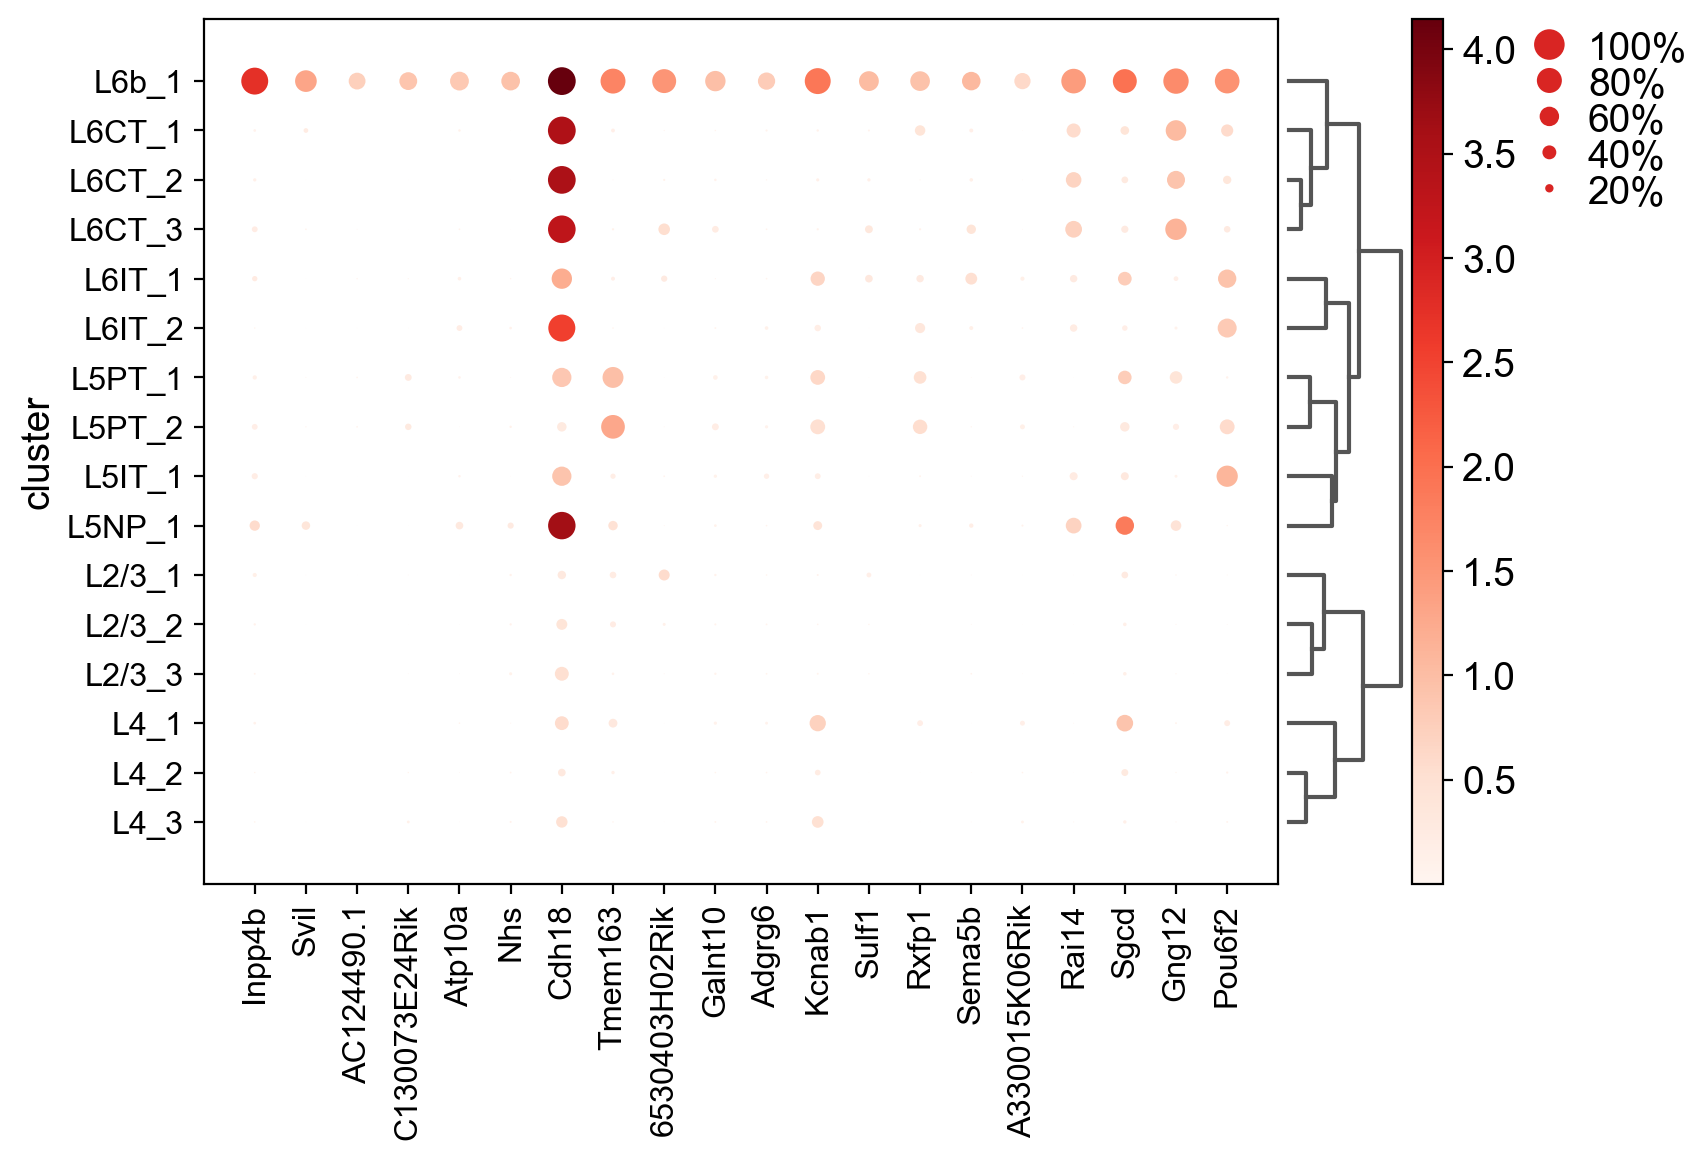

['Inpp4b', 'Svil', 'AC124490.1', 'C130073E24Rik', 'Atp10a', 'Nhs']


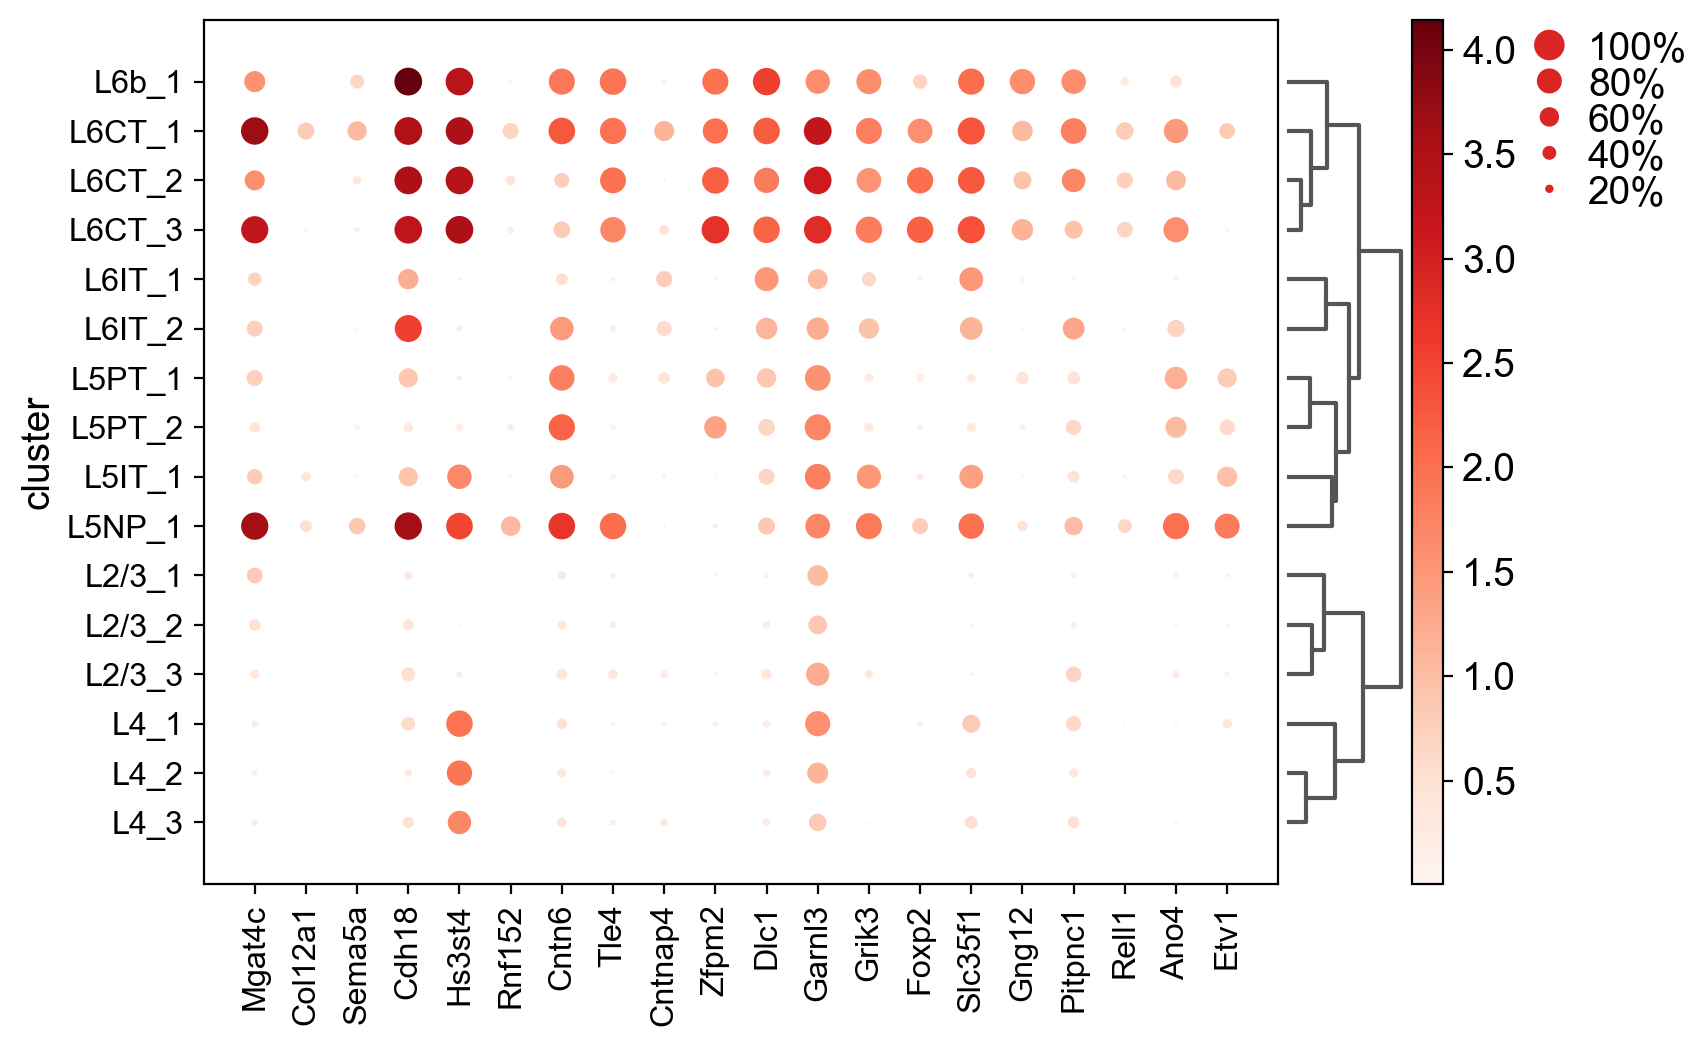

['Mgat4c', 'Col12a1', 'Sema5a', 'Cdh18', 'Hs3st4', 'Rnf152']


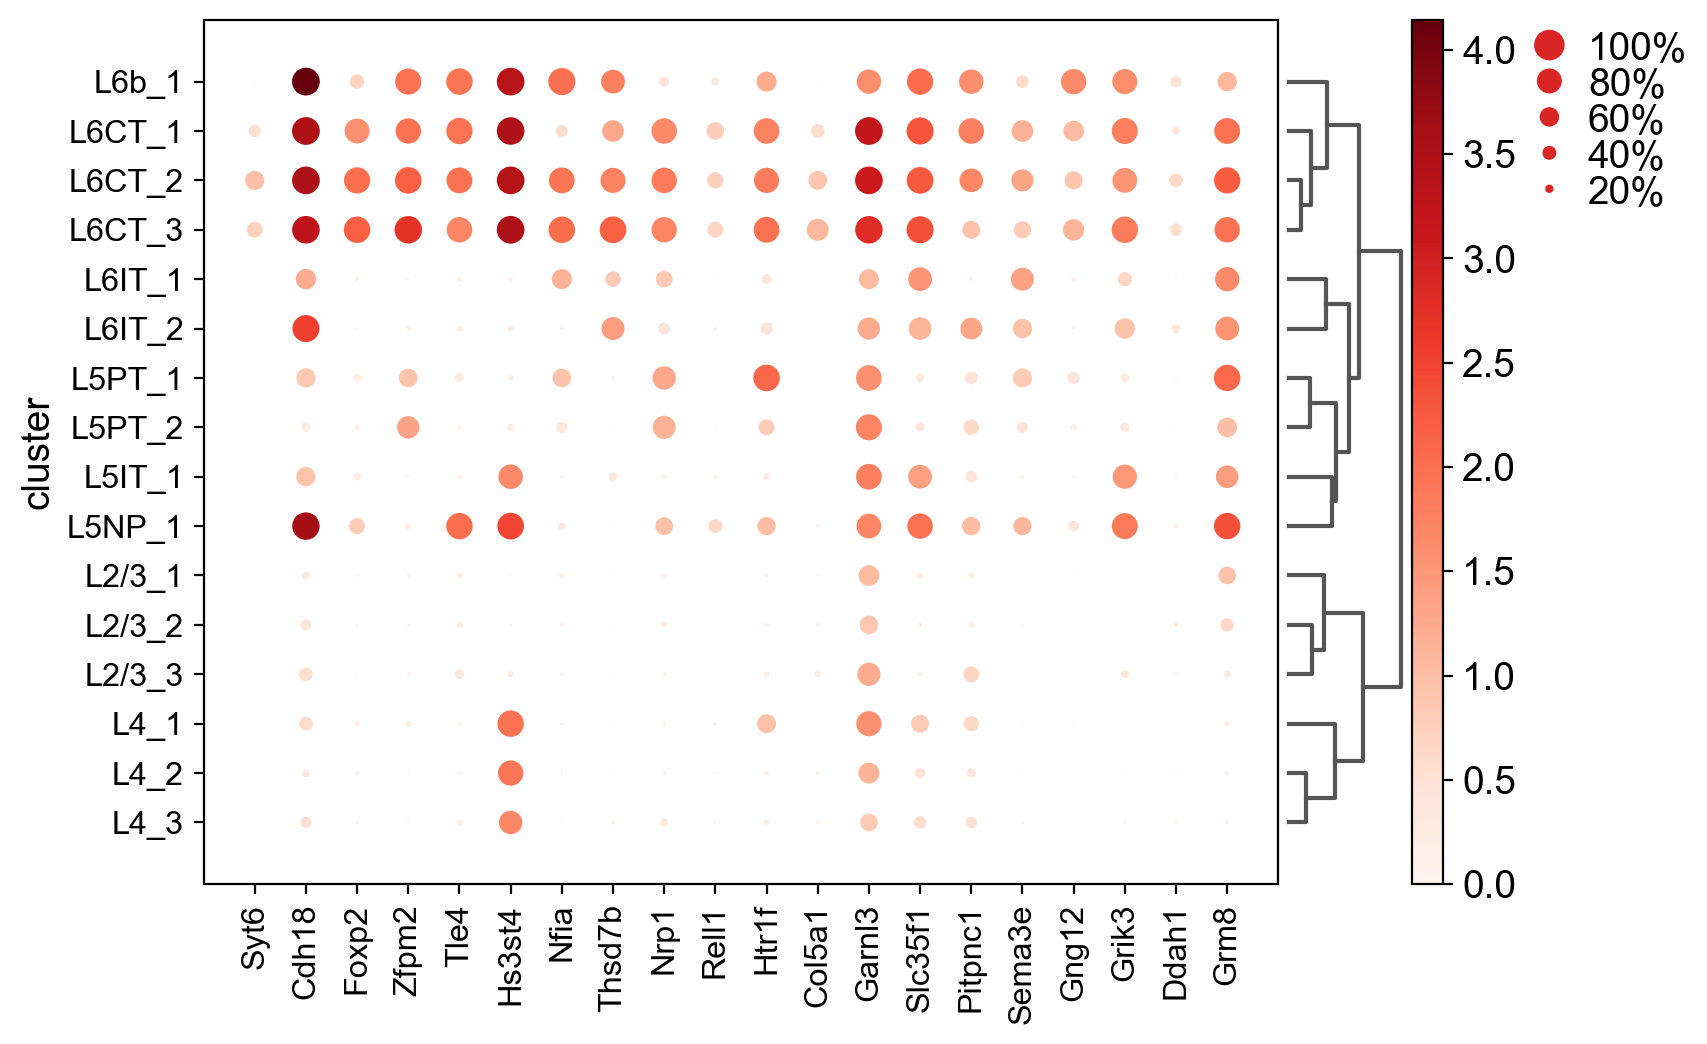

['Syt6', 'Cdh18', 'Foxp2', 'Zfpm2', 'Tle4', 'Hs3st4']


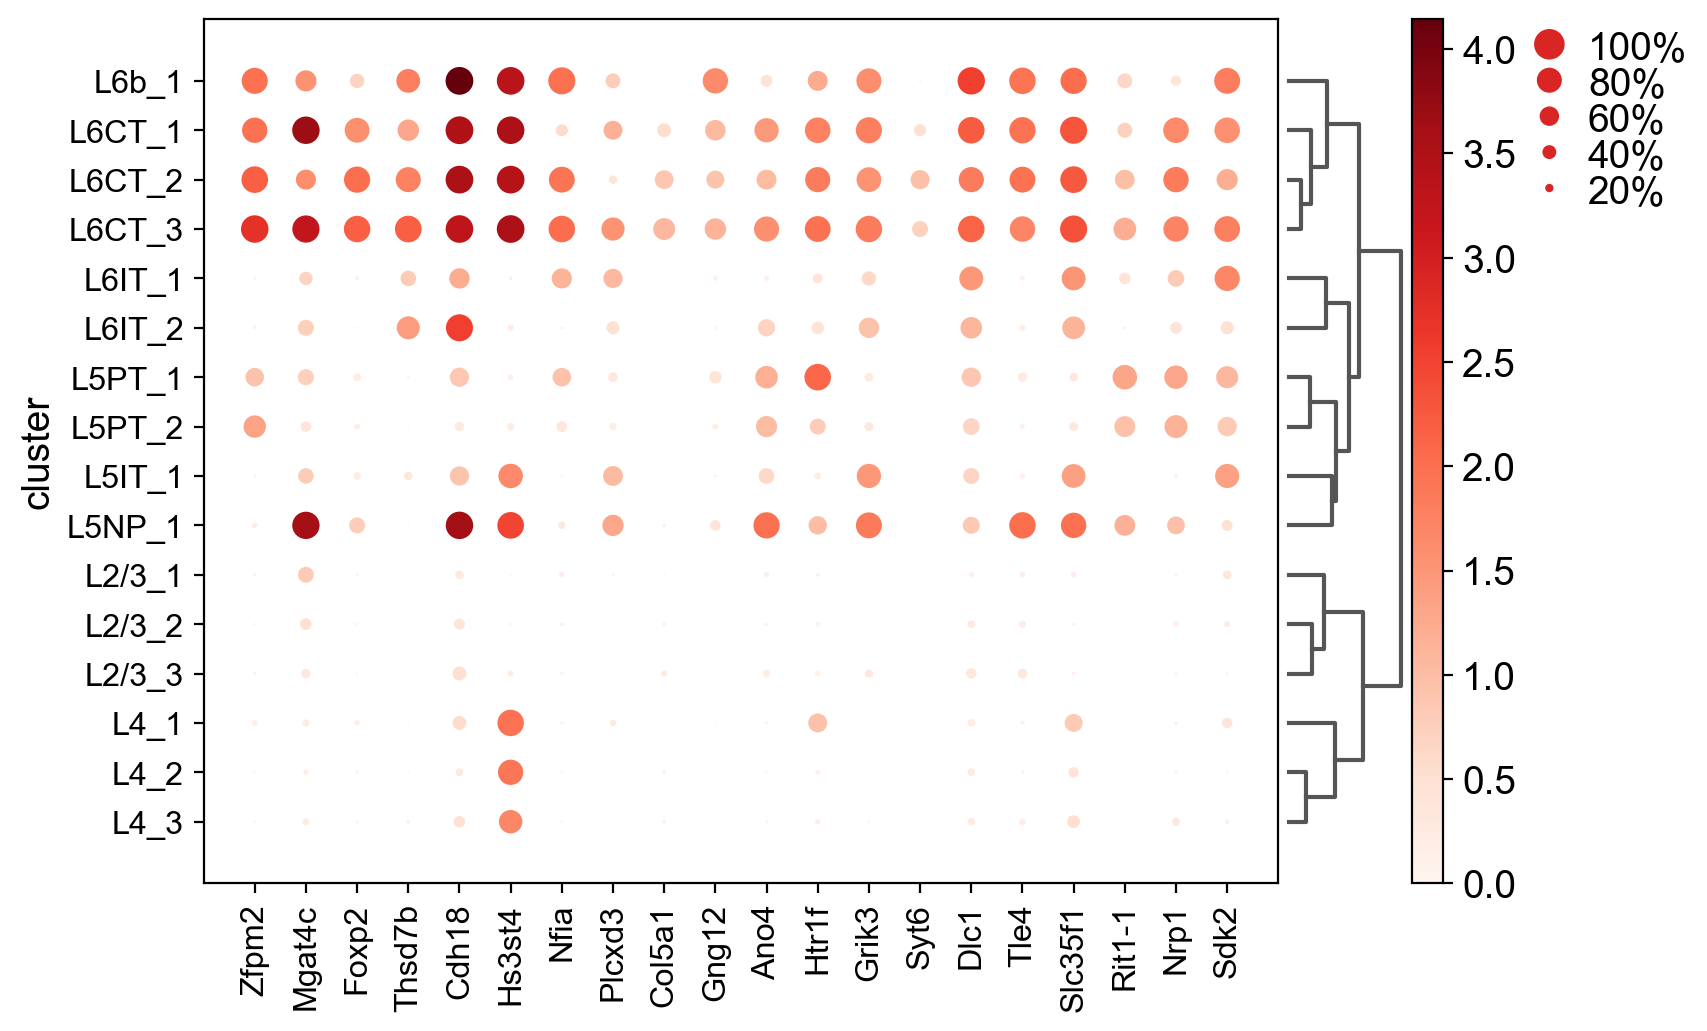

['Zfpm2', 'Mgat4c', 'Foxp2', 'Thsd7b', 'Cdh18', 'Hs3st4']


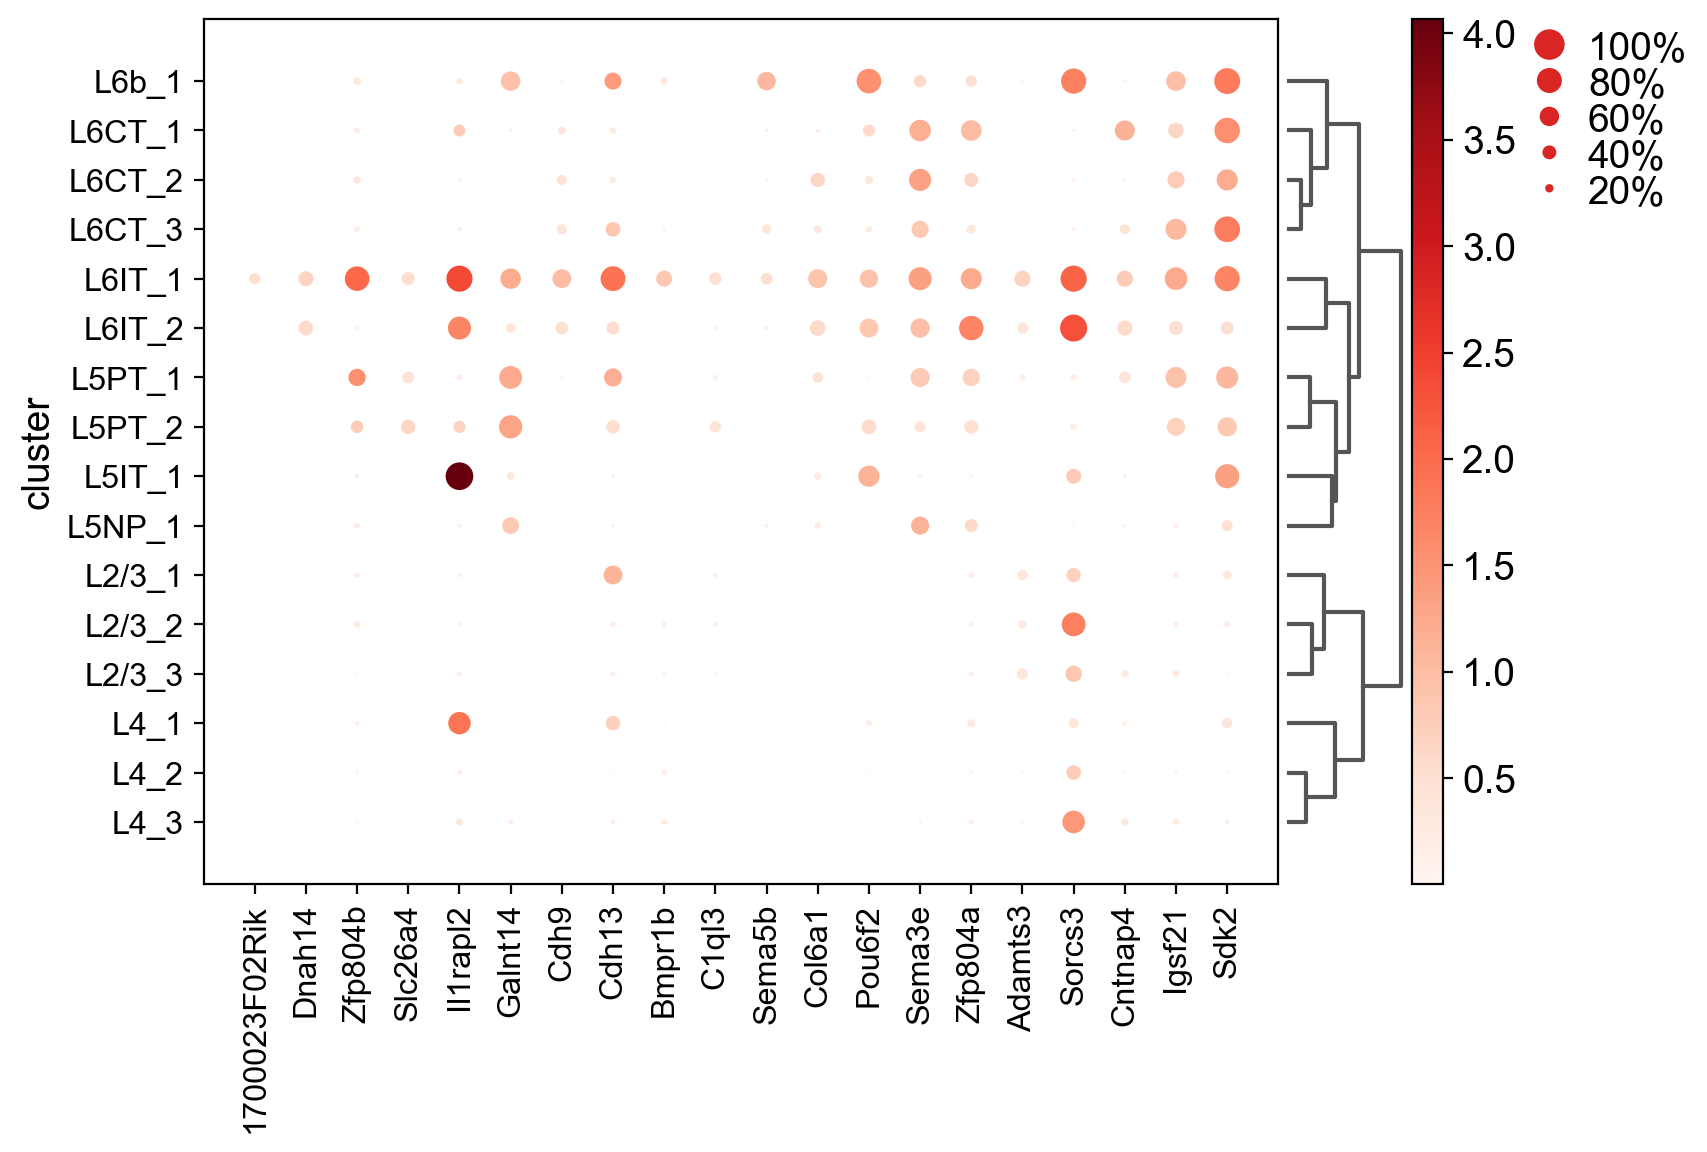

['1700023F02Rik', 'Dnah14', 'Zfp804b', 'Slc26a4', 'Il1rapl2', 'Galnt14']


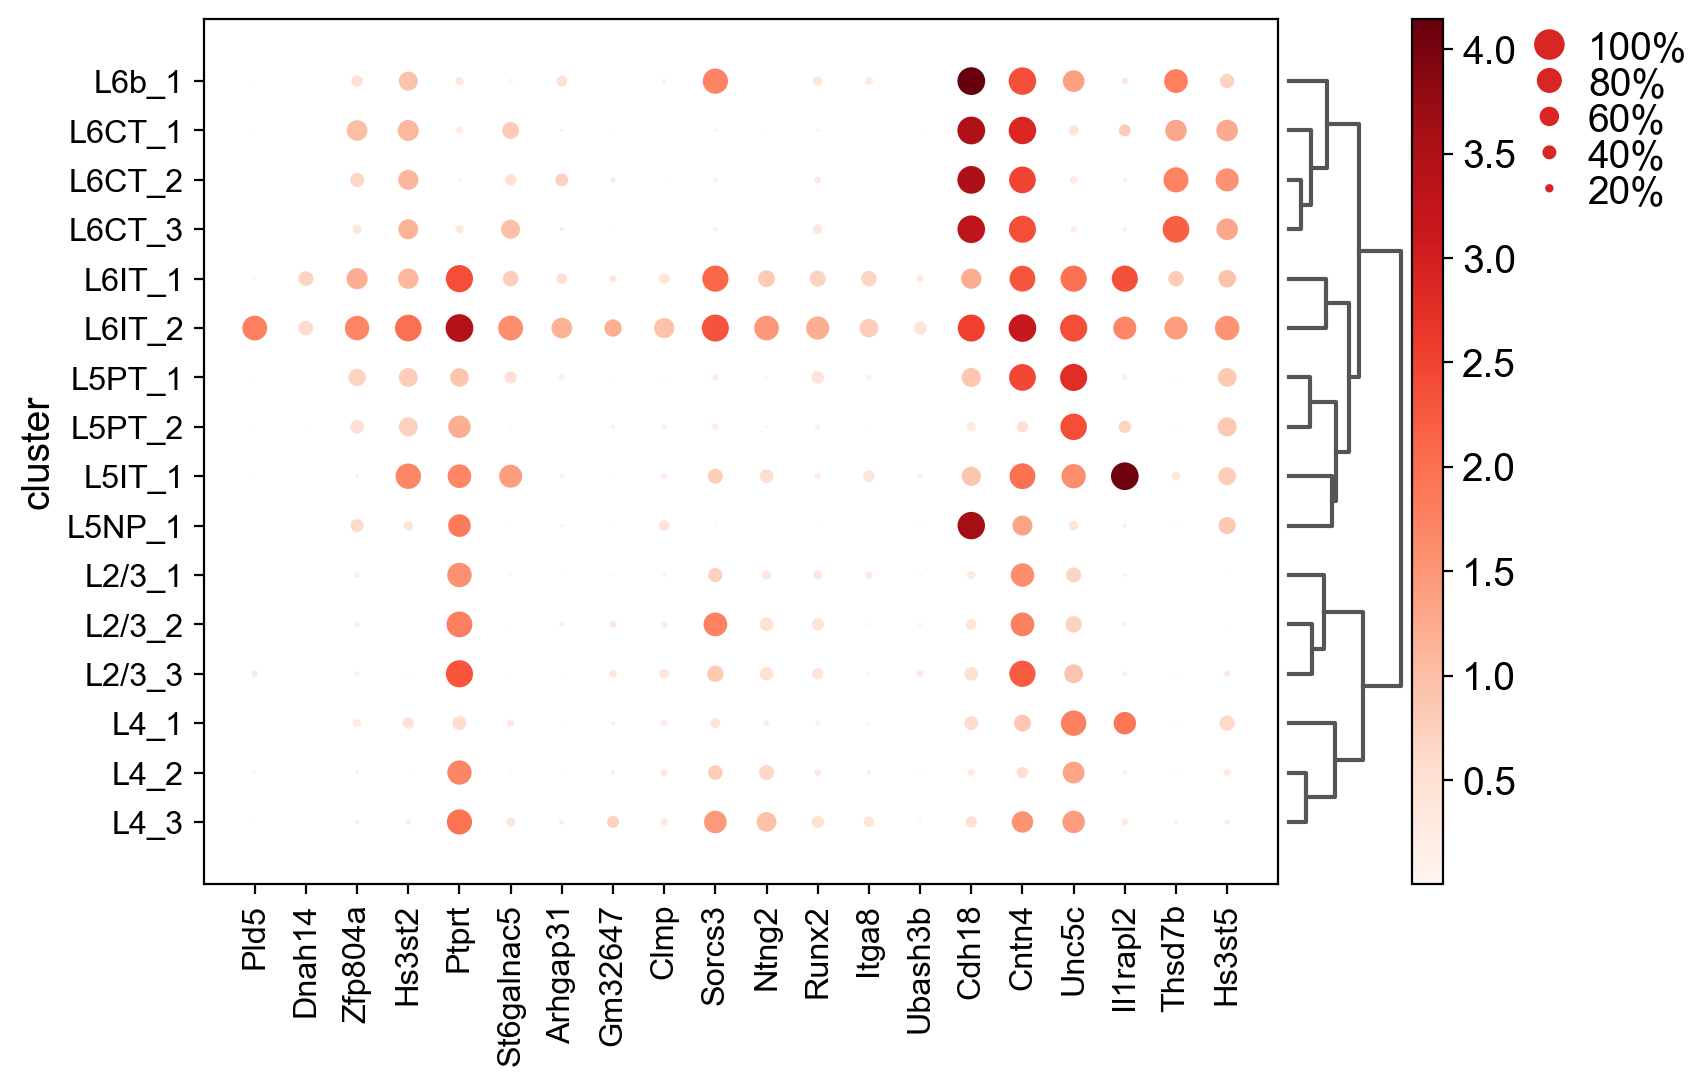

['Pld5', 'Dnah14', 'Zfp804a', 'Hs3st2', 'Ptprt', 'St6galnac5']


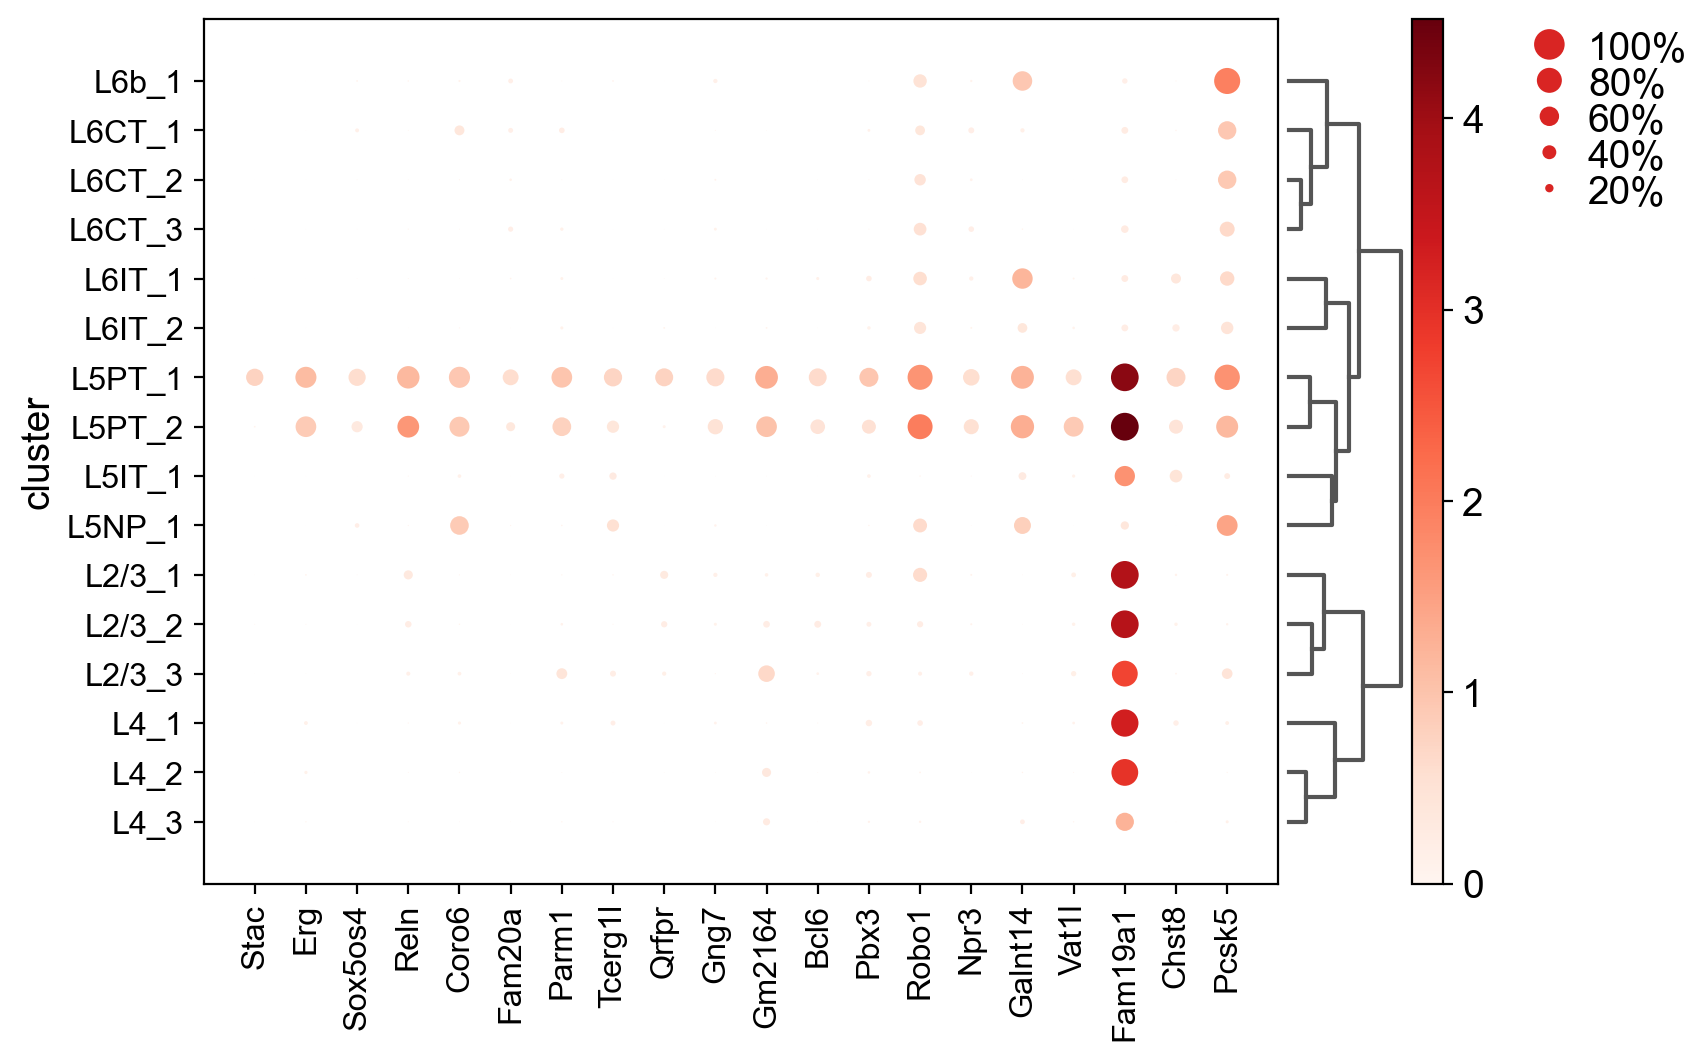

['Stac', 'Erg', 'Sox5os4', 'Reln', 'Coro6', 'Fam20a']


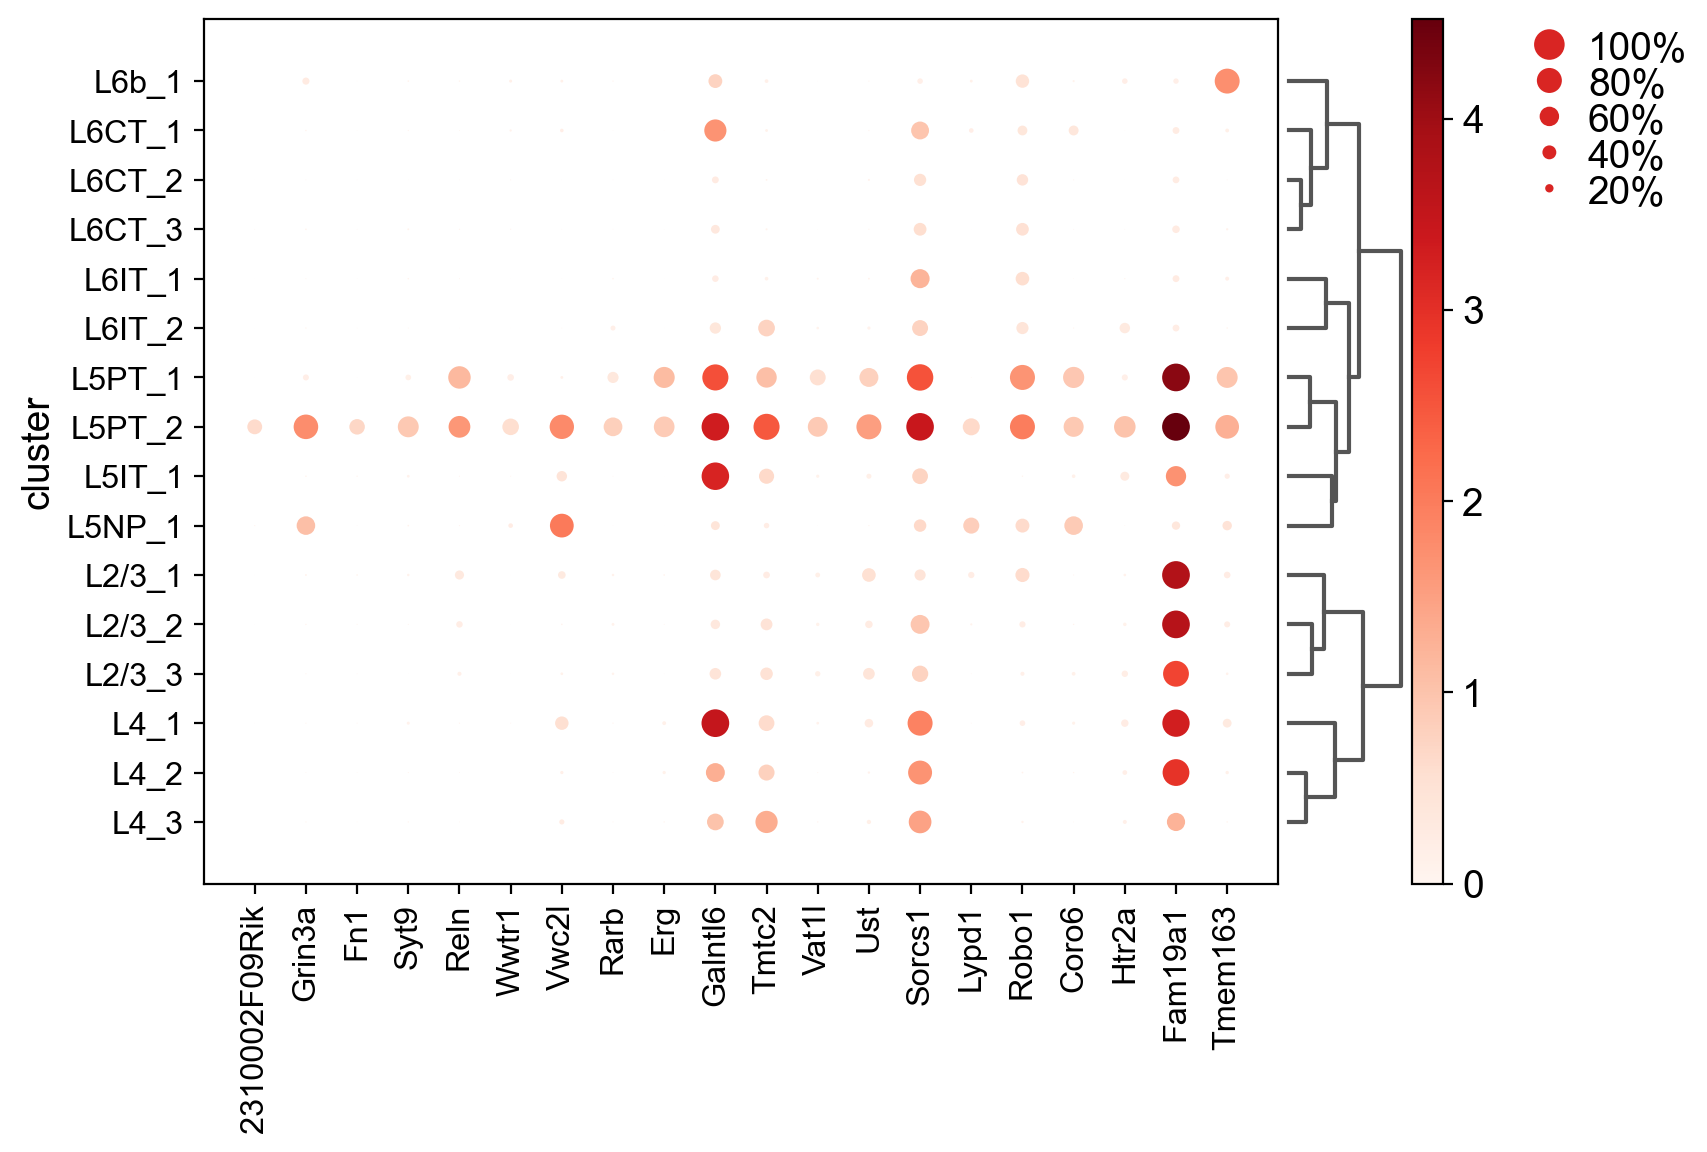

['2310002F09Rik', 'Grin3a', 'Fn1', 'Syt9', 'Reln', 'Wwtr1']


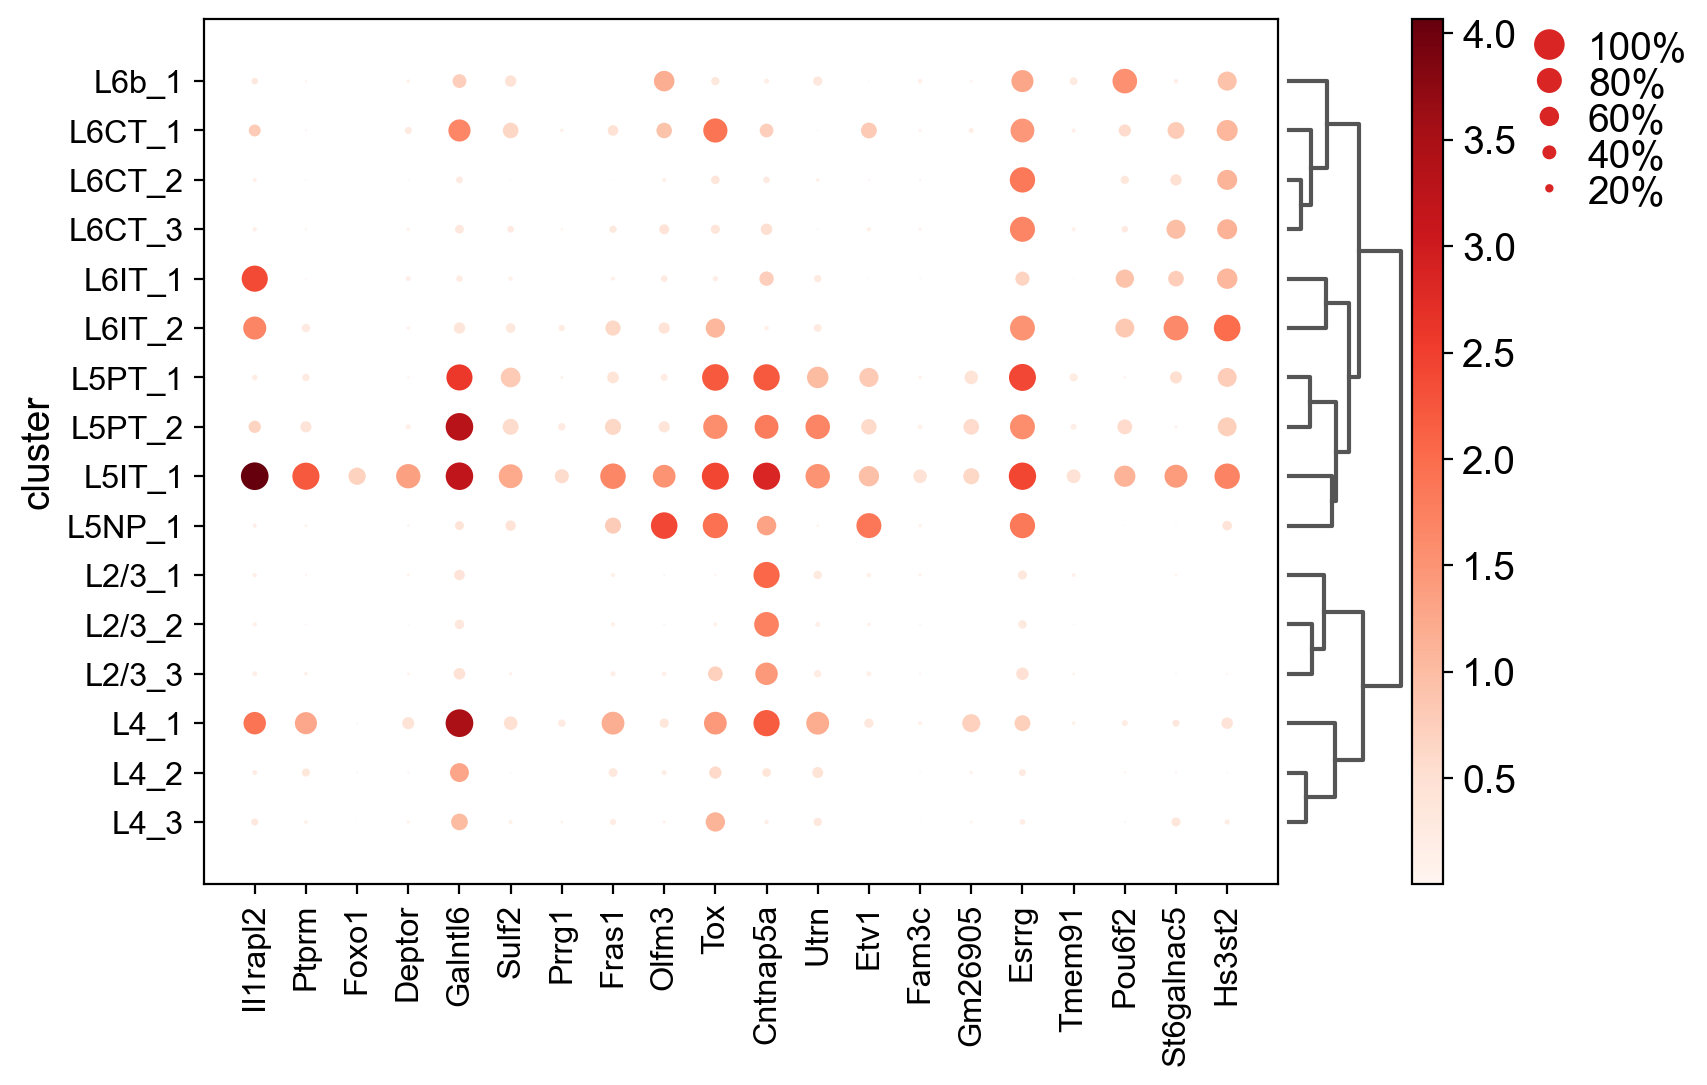

['Il1rapl2', 'Ptprm', 'Foxo1', 'Deptor', 'Galntl6', 'Sulf2']


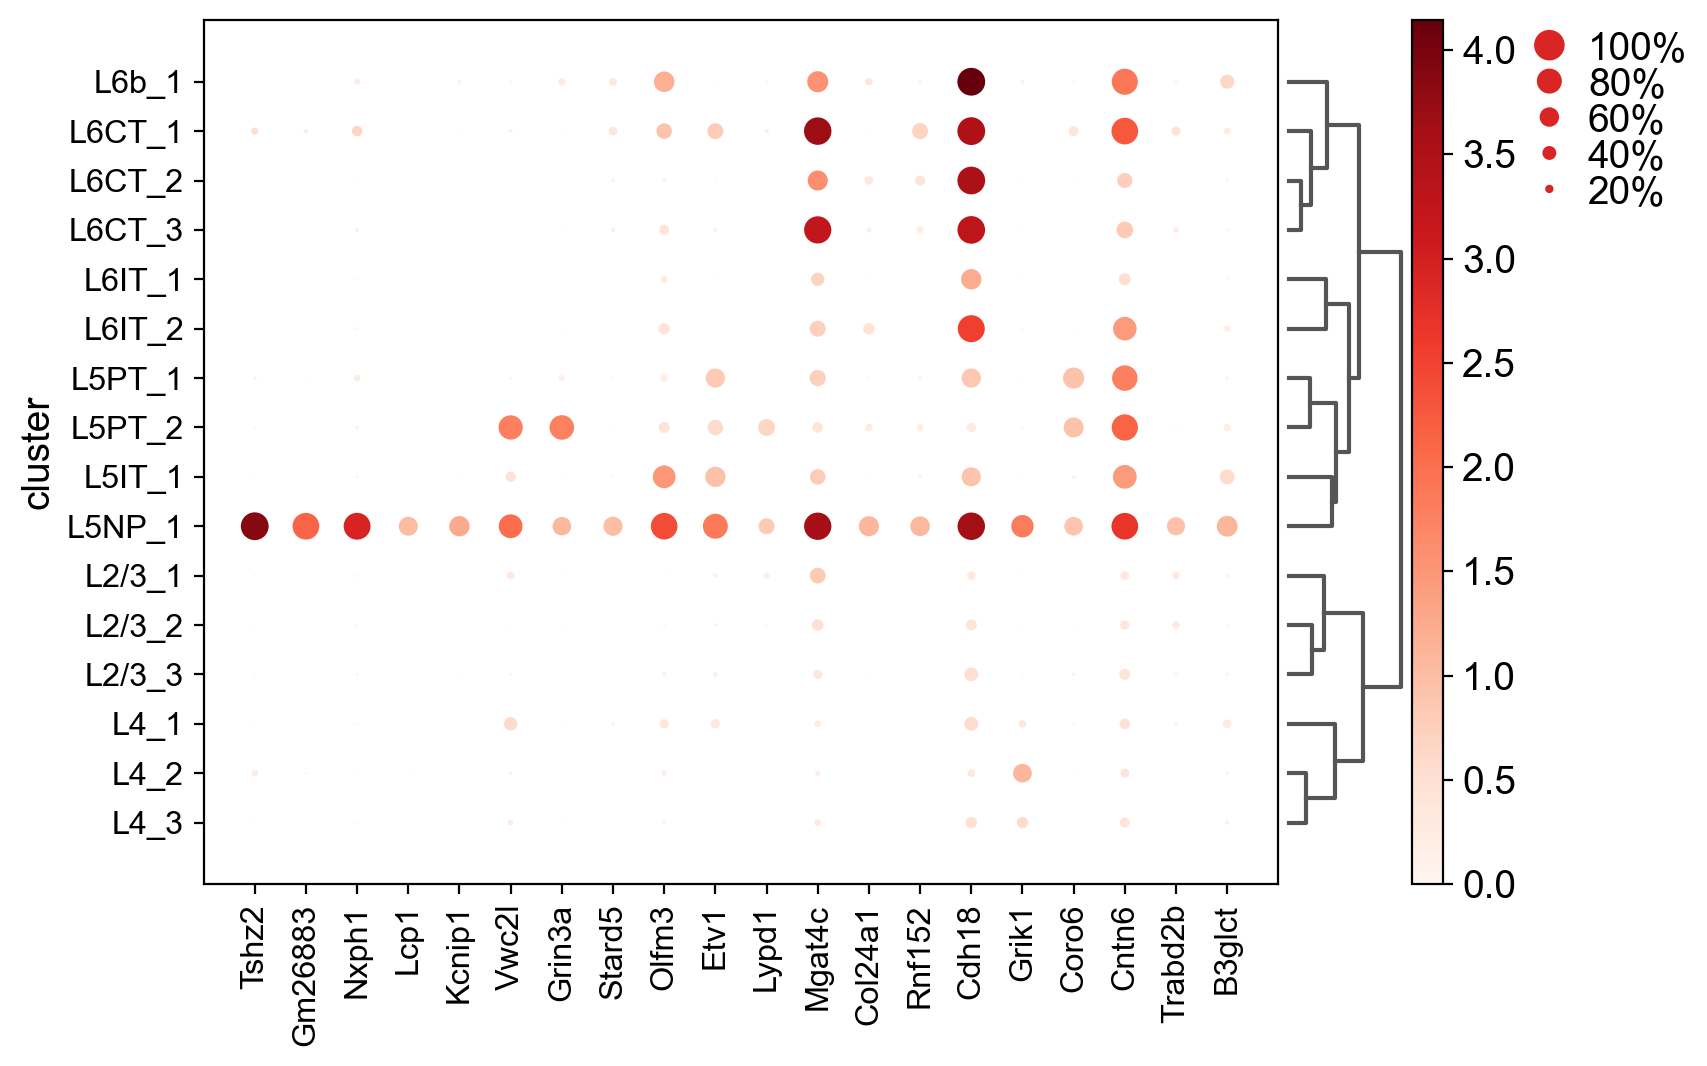

['Tshz2', 'Gm26883', 'Nxph1', 'Lcp1', 'Kcnip1', 'Vwc2l']


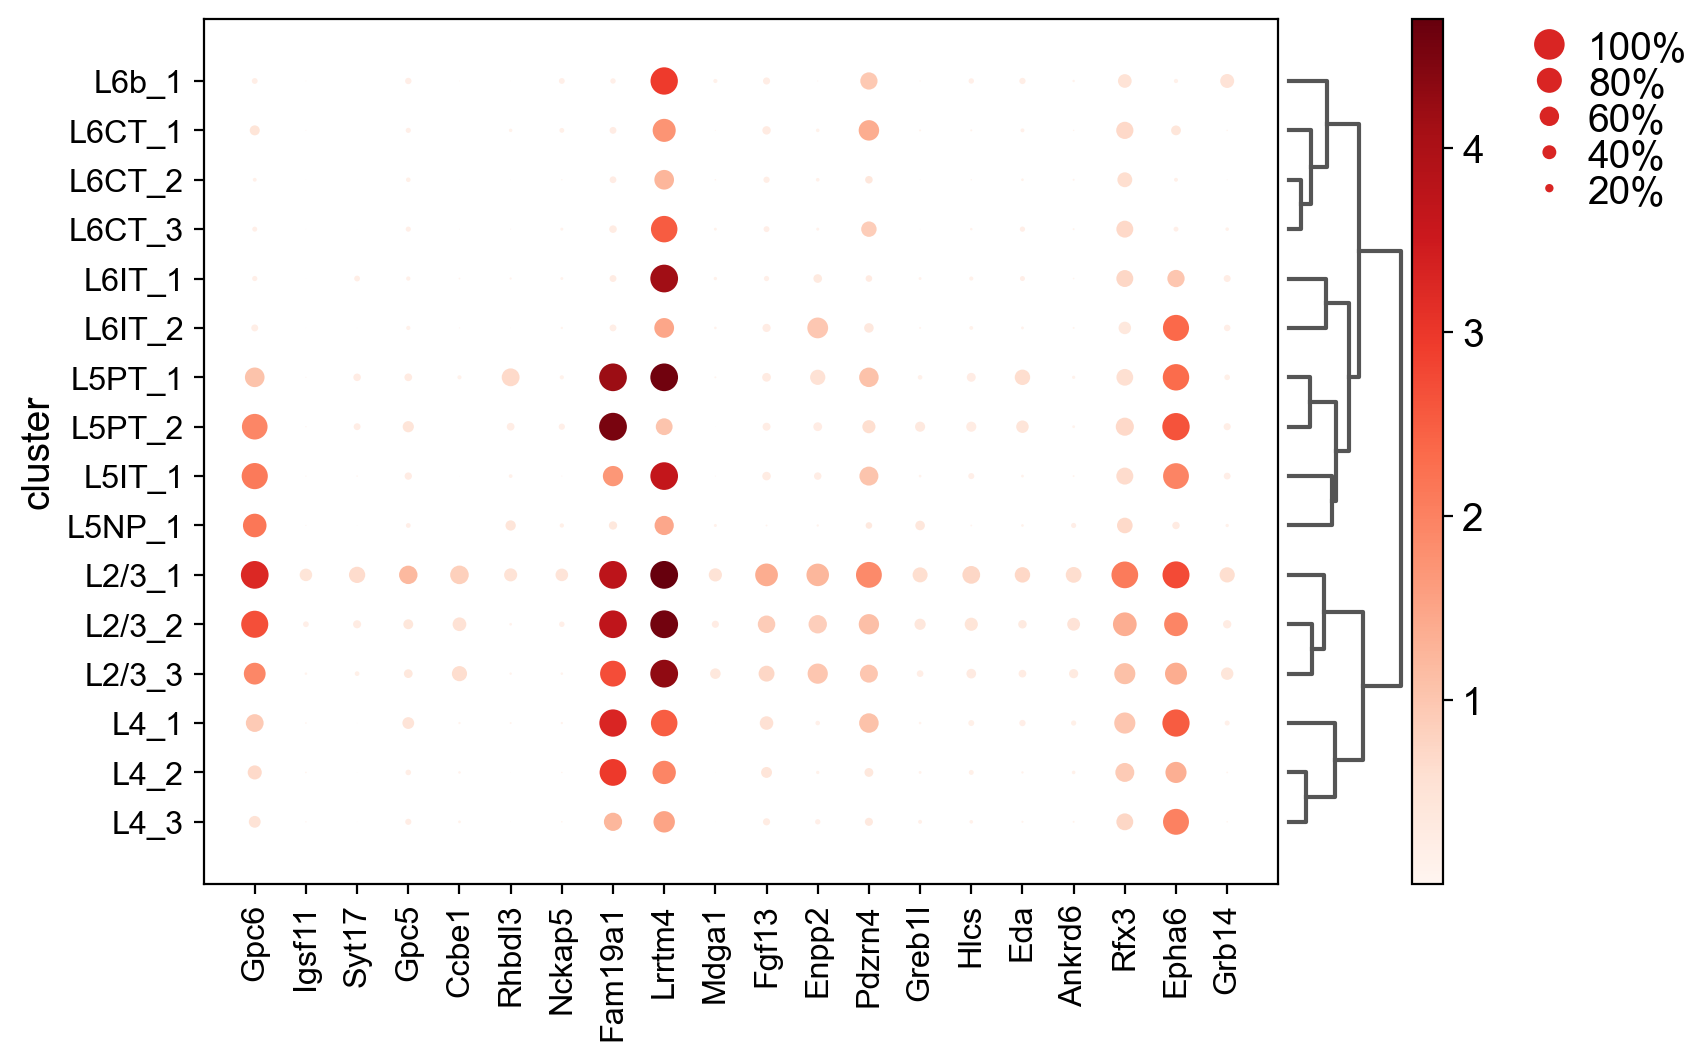

['Gpc6', 'Igsf11', 'Syt17', 'Gpc5', 'Ccbe1', 'Rhbdl3']


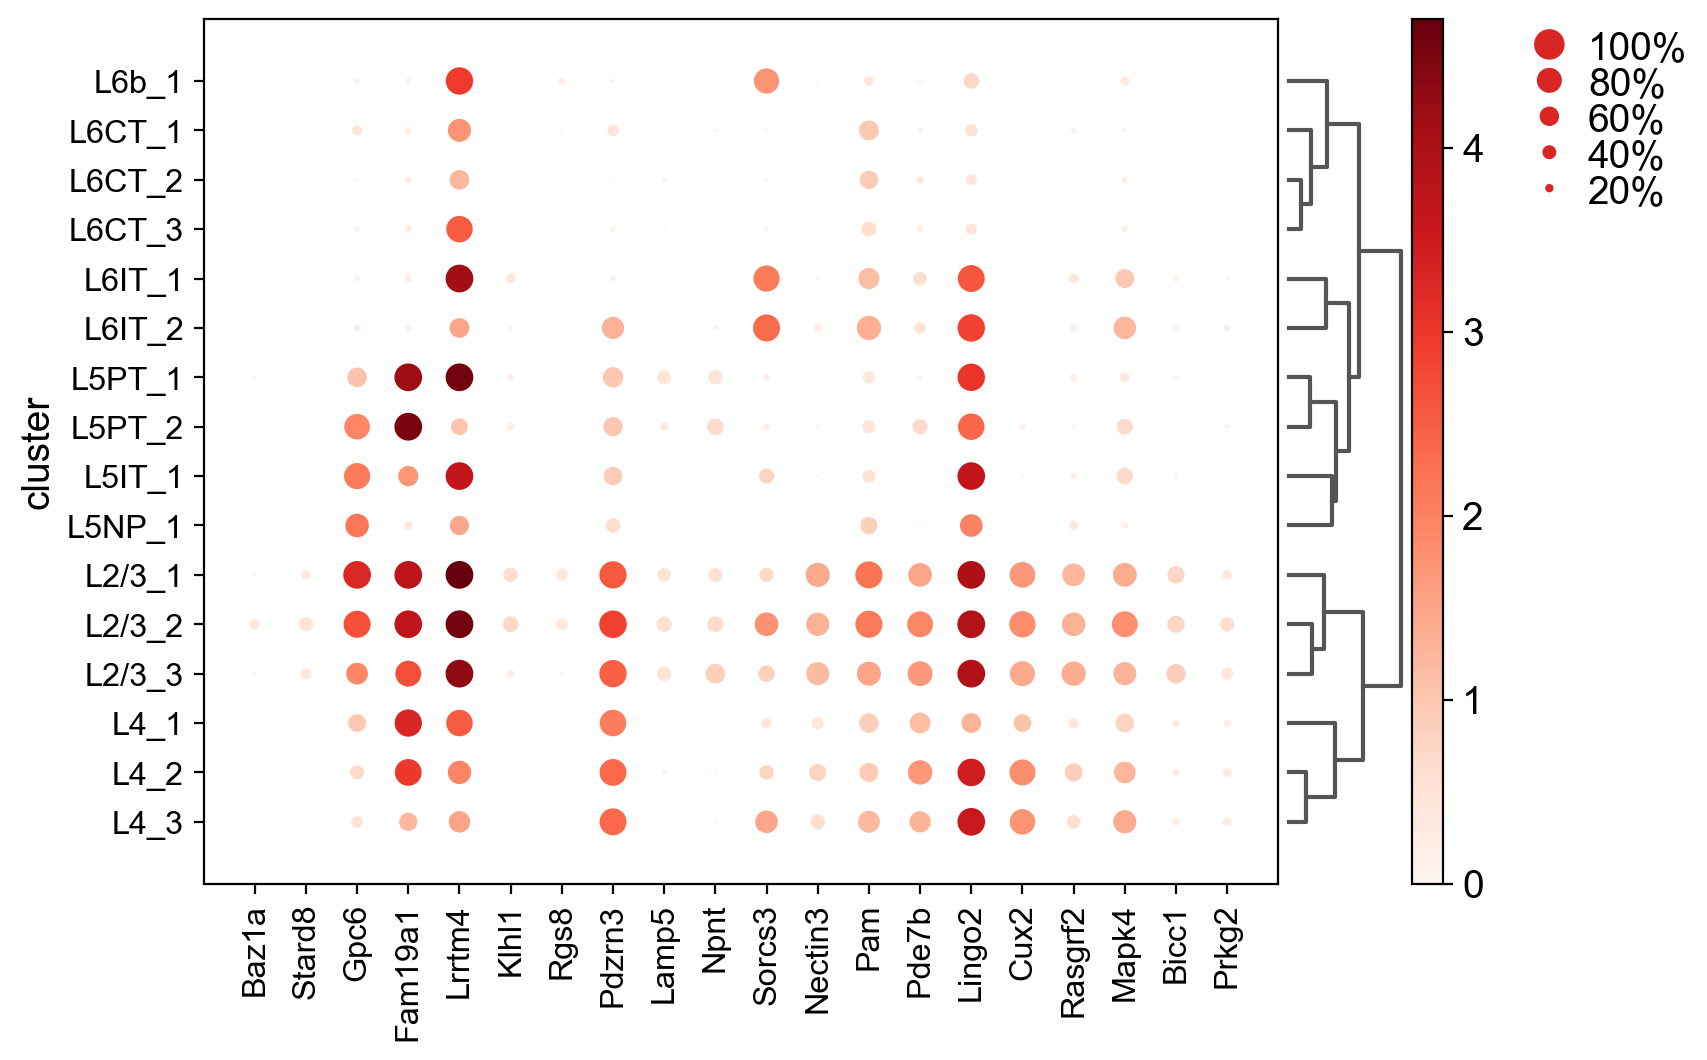

['Baz1a', 'Stard8', 'Gpc6', 'Fam19a1', 'Lrrtm4', 'Klhl1']


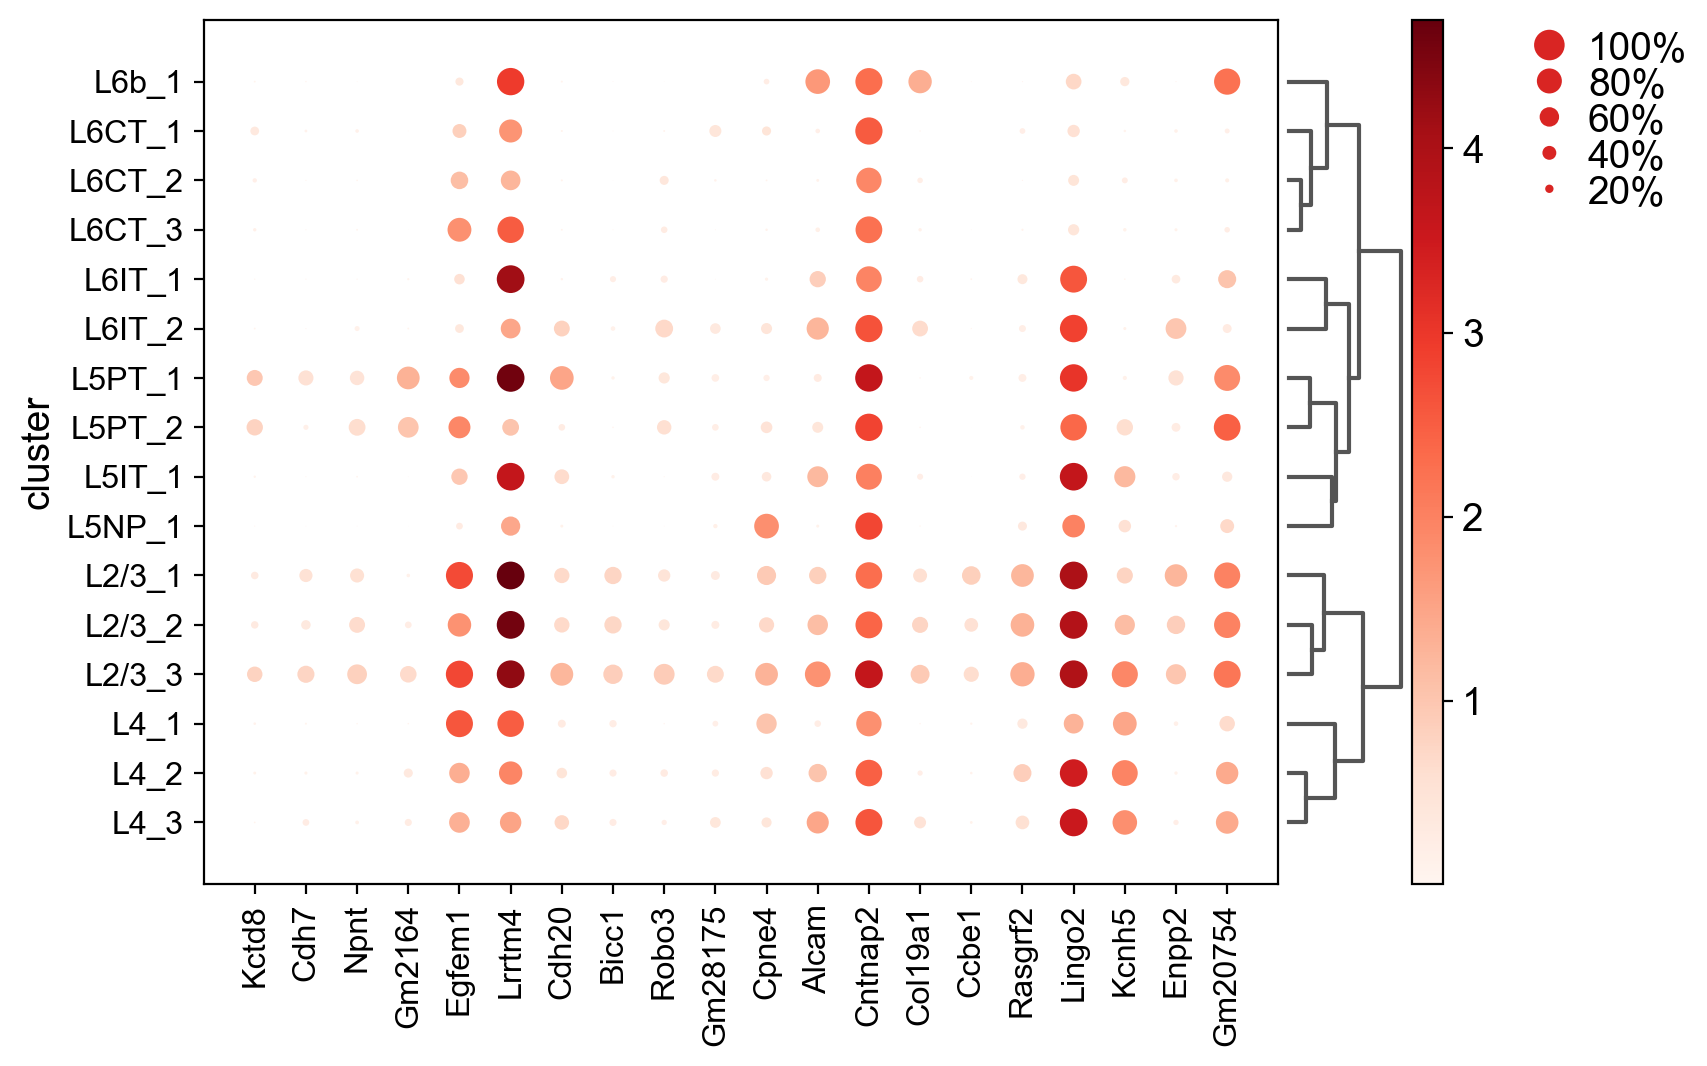

['Kctd8', 'Cdh7', 'Npnt', 'Gm2164', 'Egfem1', 'Lrrtm4']


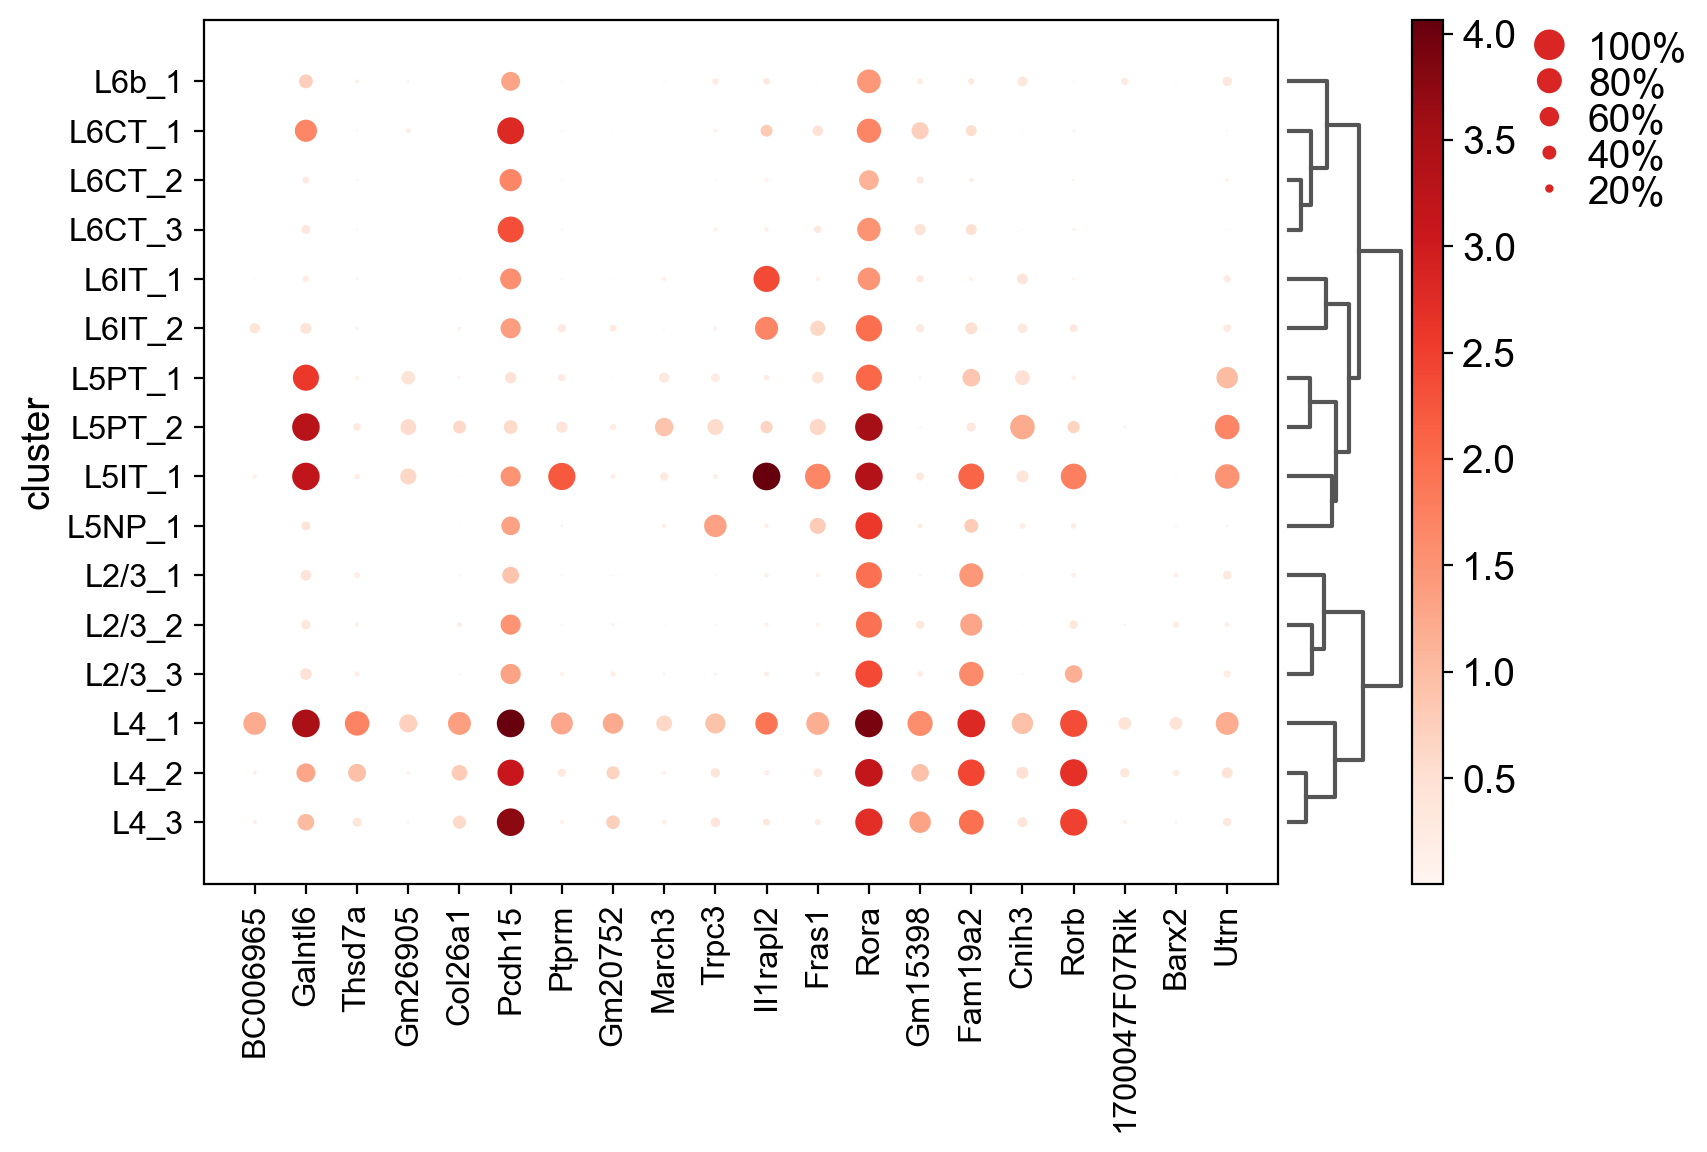

['BC006965', 'Galntl6', 'Thsd7a', 'Gm26905', 'Col26a1', 'Pcdh15']


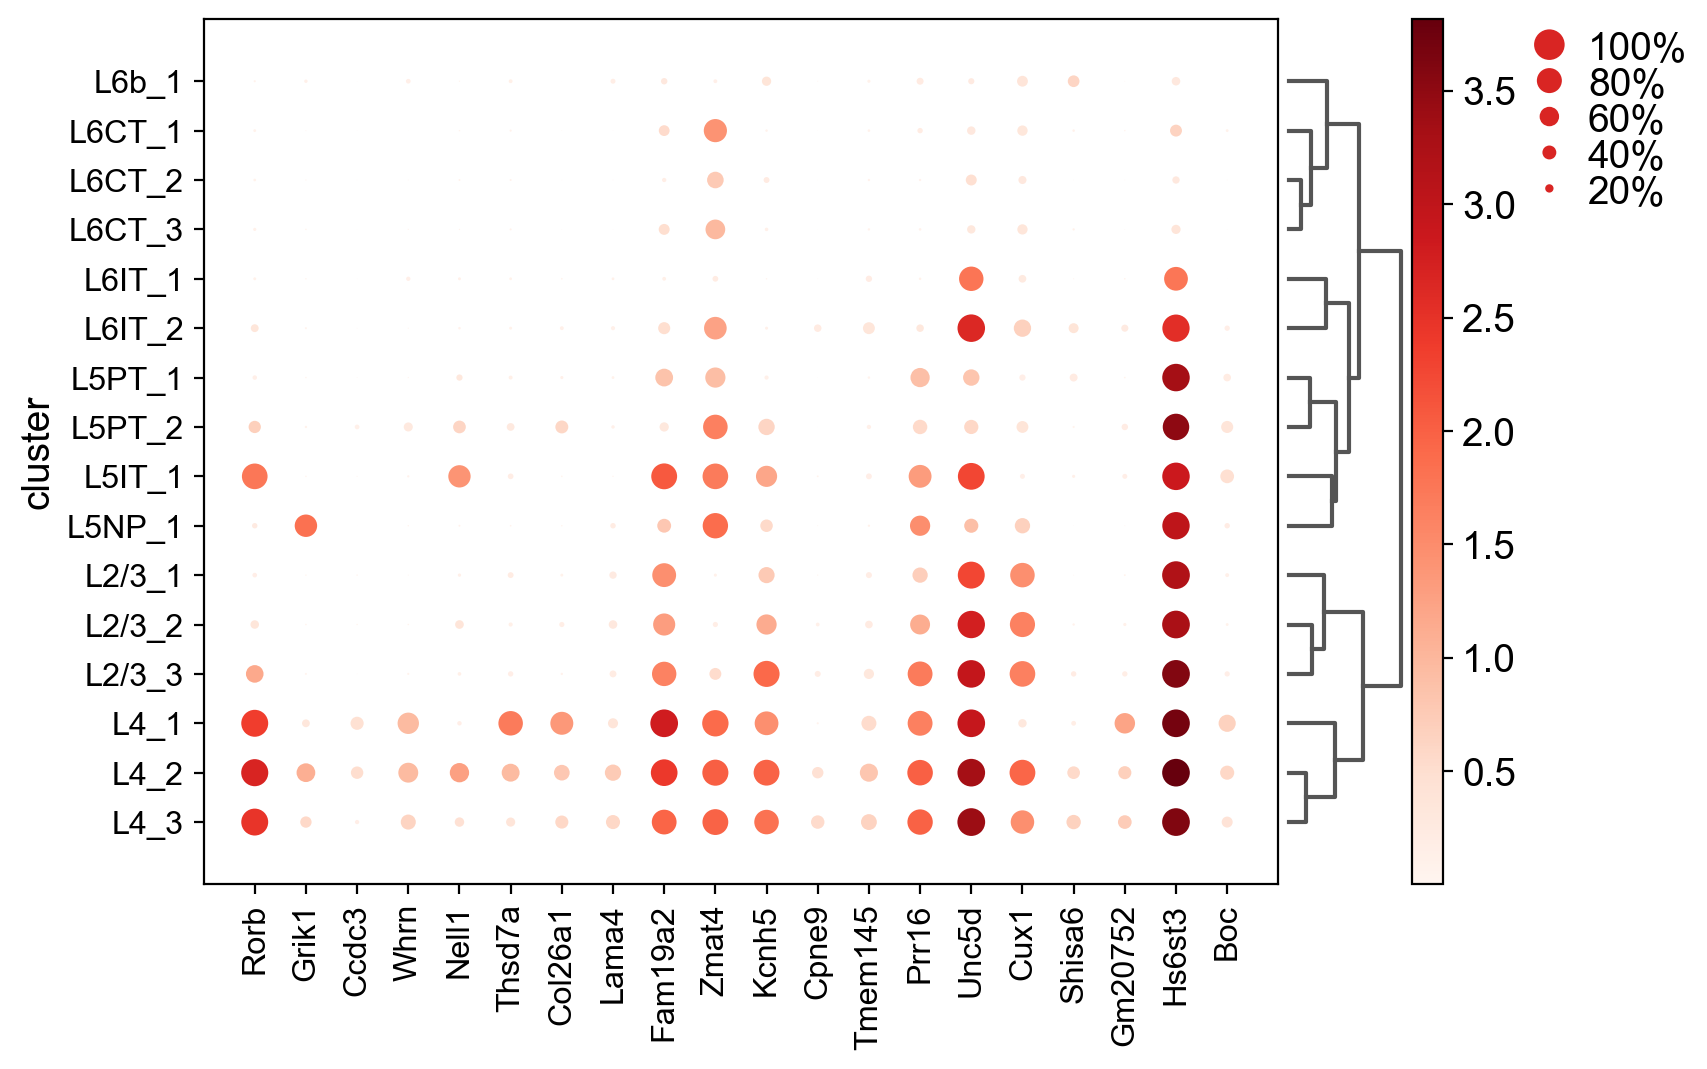

['Rorb', 'Grik1', 'Ccdc3', 'Whrn', 'Nell1', 'Thsd7a']


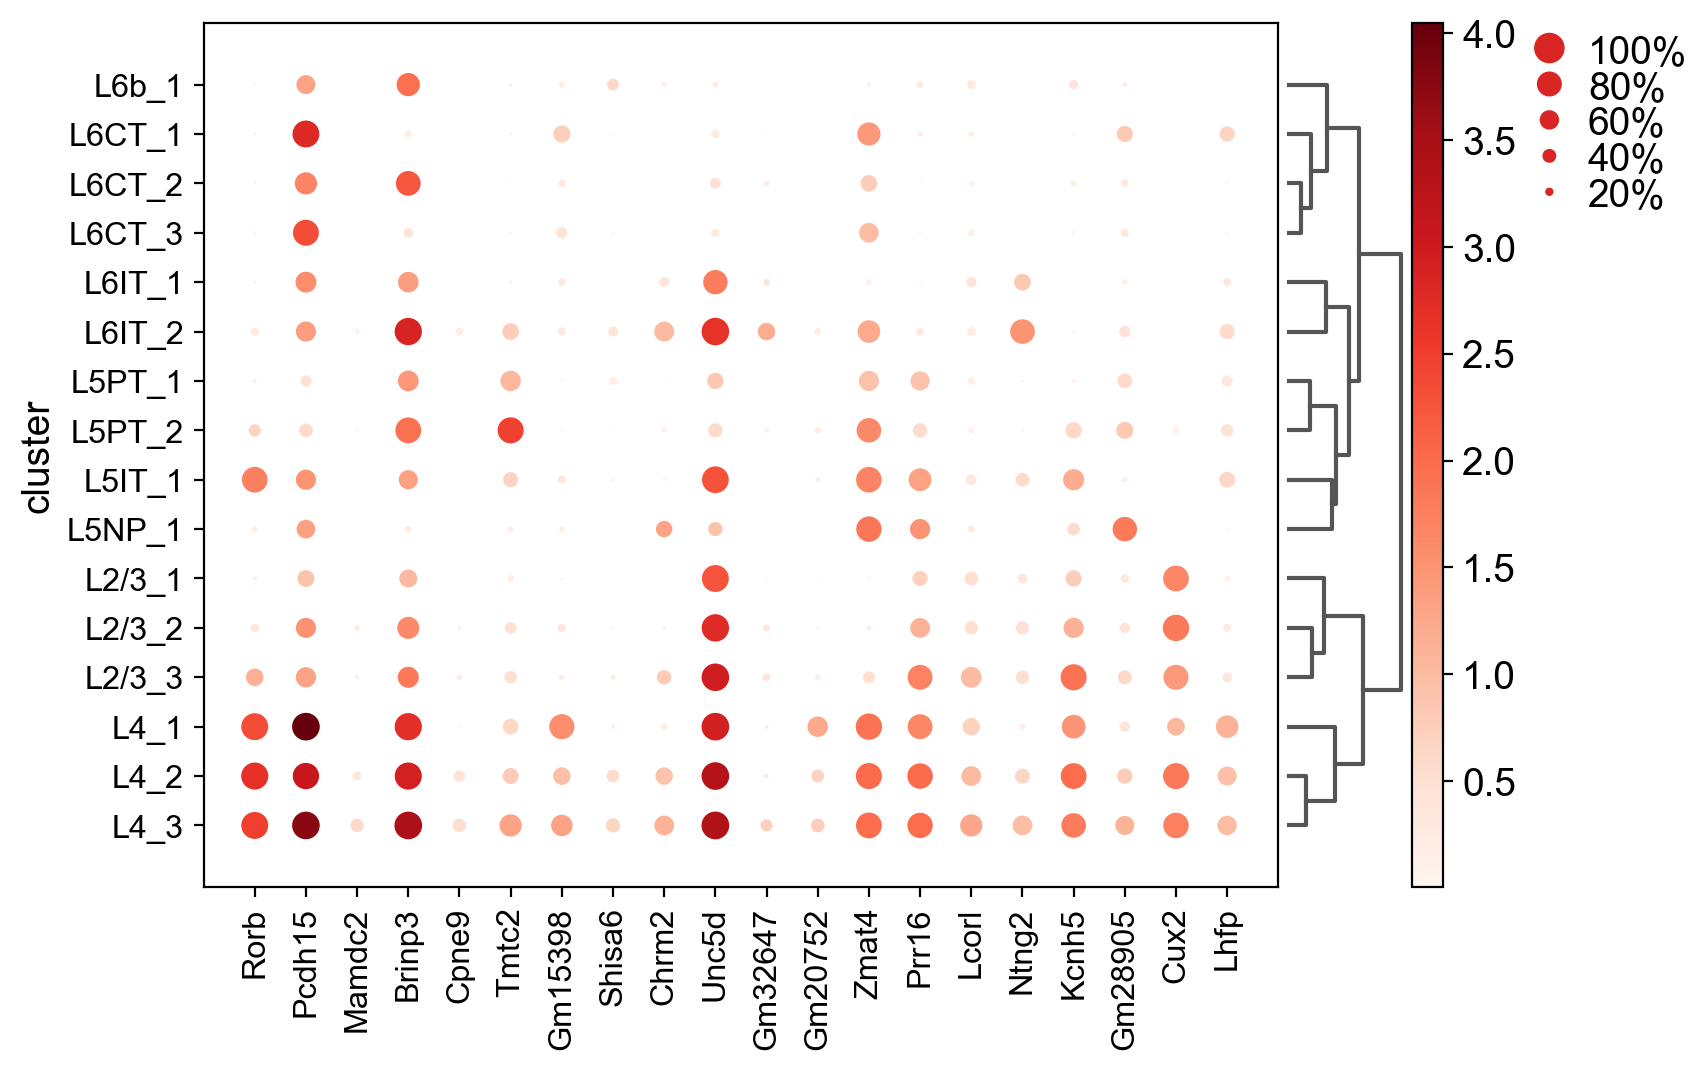

['Rorb', 'Pcdh15', 'Mamdc2', 'Brinp3', 'Cpne9', 'Tmtc2']


In [500]:
for i in P17_glut.uns['dendrogram_cluster']['dendrogram_info']['ivl']:
    cluster = i
    sc.tl.rank_genes_groups(P17_glut, groupby='cluster', groups=[cluster], reference='rest', method='wilcoxon')
    #wilcGenes23vRest = list(P17_glut.uns['rank_genes_groups']['names'].astype([(cluster, '<U50')]).view('<U50'))  #list of genes ordered by wilc score
    #if ('Malat1' in wilcGenes23vRest): del wilcGenes23vRest[wilcGenes23vRest.index('Malat1')]

    wilcLF8v14 = P17_glut.uns['rank_genes_groups']['logfoldchanges'].astype([(cluster, '<f8')]).view('<f8') #log fold changes ordered by score

    wilcGenes8v14_s = list(P17_glut.uns['rank_genes_groups']['names'].astype([(cluster, '<U50')]).view('<U50'))  #list of genes ordered by wilc score
    wilcLF8v14_s = P17_glut.uns['rank_genes_groups']['logfoldchanges'].astype([(cluster, '<f8')]).view('<f8') #numpy array of logfoldchnages to be ordered lowest to highest
    wilcLF8v14_s.sort() #log fold changes from lowest to highest
    wilcGenes8v14 = [] #list of genes ordered by logfold change: low to high
    for i in wilcLF8v14_s:
        gene_idx = np.where(wilcLF8v14 == i)[0][0]
        wilcGenes8v14.append(wilcGenes8v14_s[gene_idx])
    wilcGenes8v14_correct = []
    for i in reversed(wilcGenes8v14):
        wilcGenes8v14_correct.append(i) # #list of genes ordered by logfold change high to low

    sc.pl.dotplot(P17_glut, wilcGenes8v14_correct[0:20], groupby='cluster', dendrogram=True)
    print(wilcGenes8v14_correct[0:6])

In [5]:
P17_glut = sc.read_h5ad('P17_glut.h5ad')